# Distribution of influences

To get a grip on how much randomness influences the results, we run the same model lots of times and compare the results.

In [5]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=6_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=100 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_baseline'


# Baseline

Lasketaan työllisyysasteet nykymallissa.

In [7]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.explain()
cc1.run_distrib(n=100,startn=98,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/baseline/distrib_base',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

Parameters of lifecycle:
timestep 0.25
gamma 0.92 per anno
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True

computing 50
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3405     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0157  |
| total_timesteps    | 0        |
| value

---------------------------------
| explained_variance | 0.999    |
| fps                | 3444     |
| nupdates           | 250      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0142  |
| total_timesteps    | 5432433  |
| value_loss         | 0.0148   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3448     |
| nupdates           | 260      |
| policy_entropy     | 1        |
| policy_loss        | -0.0147  |
| total_timesteps    | 5650603  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3452     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.0114  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0135   |
---------------------------------
done
simulating  best/malli_baseline_v150
predicting...


computing 51
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3430     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00844 |
| total_timesteps    | 0        |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | -0.353   |
| fps                | 3678     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | -2.06    |
| total_timesteps    | 196353   |
| value_loss         | 21.1     |
---------------------------------
---------------------------------
| explained_variance | 0.866    |
| fps                | 3627     |
| nupdates           | 20       |
| policy_entropy     | 0.99     |
| policy_loss        | 0.749    |
| total_timesteps    | 414523   |
| value_loss         | 2.22     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3558     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00896 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0122   |
---------------------------------
done
simulating  best/malli_baseline_v151
predicting...


computing 52
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3408     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0117  |
| total_timesteps    | 0        |
| value_loss         | 0.0143   |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps                | 3699     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.268    |
| total_timesteps    | 196353   |
| value_loss         | 0.884    |
---------------------------------
---------------------------------
| explained_variance | 0.867    |
| fps                | 3641     |
| nupdates           | 20       |
| policy_entropy     | 0.99     |
| policy_loss        | -0.719   |
| total_timesteps    | 414523   |
| value_loss         | 2.17     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3559     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0144  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0146   |
---------------------------------
done
simulating  best/malli_baseline_v152
predicting...


computing 53
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3450     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0118  |
| total_timesteps    | 0        |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.499    |
| fps                | 3705     |
| nupdates           | 10       |
| policy_entropy     | 0.986    |
| policy_loss        | -0.917   |
| total_timesteps    | 196353   |
| value_loss         | 6.9      |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 3647     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.0385   |
| total_timesteps    | 414523   |
| value_loss         | 0.428    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3556     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0103  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0107   |
---------------------------------
done
simulating  best/malli_baseline_v153
predicting...


computing 54
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3457     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0194  |
| total_timesteps    | 0        |
| value_loss         | 0.0142   |
---------------------------------
---------------------------------
| explained_variance | 0.438    |
| fps                | 3697     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | 1.13     |
| total_timesteps    | 196353   |
| value_loss         | 8.02     |
---------------------------------
---------------------------------
| explained_variance | 0.743    |
| fps                | 3637     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | -0.818   |
| total_timesteps    | 414523   |
| value_loss         | 3.85     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3573     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0142  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0133   |
---------------------------------
done
simulating  best/malli_baseline_v154
predicting...


computing 55
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3383     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0123  |
| total_timesteps    | 0        |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.832    |
| fps                | 3695     |
| nupdates           | 10       |
| policy_entropy     | 0.999    |
| policy_loss        | 0.775    |
| total_timesteps    | 196353   |
| value_loss         | 2.6      |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 3630     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | -0.158   |
| total_timesteps    | 414523   |
| value_loss         | 0.542    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3566     |
| nupdates           | 270      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0126  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0113   |
---------------------------------
done
simulating  best/malli_baseline_v155
predicting...


computing 56
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3429     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.013   |
| total_timesteps    | 0        |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 0.911    |
| fps                | 3632     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | -0.21    |
| total_timesteps    | 196353   |
| value_loss         | 1.12     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 3602     |
| nupdates           | 20       |
| policy_entropy     | 0.99     |
| policy_loss        | -0.302   |
| total_timesteps    | 414523   |
| value_loss         | 0.404    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3560     |
| nupdates           | 270      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0116  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0137   |
---------------------------------
done
simulating  best/malli_baseline_v156
predicting...


computing 57
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3413     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0185  |
| total_timesteps    | 0        |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.895    |
| fps                | 3666     |
| nupdates           | 10       |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0453  |
| total_timesteps    | 196353   |
| value_loss         | 1.3      |
---------------------------------
---------------------------------
| explained_variance | 0.908    |
| fps                | 3616     |
| nupdates           | 20       |
| policy_entropy     | 0.982    |
| policy_loss        | -0.541   |
| total_timesteps    | 414523   |
| value_loss         | 1.47     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3563     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0137  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0153   |
---------------------------------
done
simulating  best/malli_baseline_v157
predicting...


computing 58
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3420     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0126  |
| total_timesteps    | 0        |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.931    |
| fps                | 3703     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | 0.3      |
| total_timesteps    | 196353   |
| value_loss         | 0.945    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 3638     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.35    |
| total_timesteps    | 414523   |
| value_loss         | 0.404    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3569     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.017   |
| total_timesteps    | 5868773  |
| value_loss         | 0.0117   |
---------------------------------
done
simulating  best/malli_baseline_v158
predicting...


computing 59
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3403     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0112  |
| total_timesteps    | 0        |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.791    |
| fps                | 3691     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.248   |
| total_timesteps    | 196353   |
| value_loss         | 2.72     |
---------------------------------
---------------------------------
| explained_variance | 0.925    |
| fps                | 3638     |
| nupdates           | 20       |
| policy_entropy     | 0.973    |
| policy_loss        | 0.221    |
| total_timesteps    | 414523   |
| value_loss         | 0.939    |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 3573     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.0152  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0195   |
---------------------------------
done
simulating  best/malli_baseline_v159
predicting...


computing 60
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3426     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00938 |
| total_timesteps    | 0        |
| value_loss         | 0.0152   |
---------------------------------
---------------------------------
| explained_variance | 0.323    |
| fps                | 3706     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 1.04     |
| total_timesteps    | 196353   |
| value_loss         | 9.23     |
---------------------------------
---------------------------------
| explained_variance | 0.748    |
| fps                | 3643     |
| nupdates           | 20       |
| policy_entropy     | 0.976    |
| policy_loss        | -0.866   |
| total_timesteps    | 414523   |
| value_loss         | 3.91     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3578     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00948 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0128   |
---------------------------------
done
simulating  best/malli_baseline_v160
predicting...


computing 61
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3406     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0138  |
| total_timesteps    | 0        |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 3706     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.193   |
| total_timesteps    | 196353   |
| value_loss         | 0.549    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 3636     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.287    |
| total_timesteps    | 414523   |
| value_loss         | 0.383    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3568     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00474 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0161   |
---------------------------------
done
simulating  best/malli_baseline_v161
predicting...


computing 62
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3439     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00818 |
| total_timesteps    | 0        |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.891    |
| fps                | 3687     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | -0.34    |
| total_timesteps    | 196353   |
| value_loss         | 1.4      |
---------------------------------
---------------------------------
| explained_variance | 0.9      |
| fps                | 3637     |
| nupdates           | 20       |
| policy_entropy     | 0.988    |
| policy_loss        | -0.235   |
| total_timesteps    | 414523   |
| value_loss         | 1.28     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3579     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.011   |
| total_timesteps    | 5868773  |
| value_loss         | 0.0136   |
---------------------------------
done
simulating  best/malli_baseline_v162
predicting...


computing 63
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3418     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0108  |
| total_timesteps    | 0        |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 3693     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | 0.0859   |
| total_timesteps    | 196353   |
| value_loss         | 0.571    |
---------------------------------
---------------------------------
| explained_variance | 0.936    |
| fps                | 3632     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.534   |
| total_timesteps    | 414523   |
| value_loss         | 1.05     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3580     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.01    |
| total_timesteps    | 5868773  |
| value_loss         | 0.0147   |
---------------------------------
done
simulating  best/malli_baseline_v163
predicting...


computing 64
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3439     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0124  |
| total_timesteps    | 0        |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.86     |
| fps                | 3699     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.771    |
| total_timesteps    | 196353   |
| value_loss         | 2.21     |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 3642     |
| nupdates           | 20       |
| policy_entropy     | 0.994    |
| policy_loss        | -0.223   |
| total_timesteps    | 414523   |
| value_loss         | 0.489    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3580     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00754 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0113   |
---------------------------------
done
simulating  best/malli_baseline_v164
predicting...


computing 65
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3395     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0123  |
| total_timesteps    | 0        |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.551    |
| fps                | 3718     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | 1.31     |
| total_timesteps    | 196353   |
| value_loss         | 7.05     |
---------------------------------
---------------------------------
| explained_variance | 0.853    |
| fps                | 3652     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | -0.526   |
| total_timesteps    | 414523   |
| value_loss         | 2.14     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3588     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0112  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0147   |
---------------------------------
done
simulating  best/malli_baseline_v165
predicting...


computing 66
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3449     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0144  |
| total_timesteps    | 0        |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.928    |
| fps                | 3697     |
| nupdates           | 10       |
| policy_entropy     | 0.999    |
| policy_loss        | 0.413    |
| total_timesteps    | 196353   |
| value_loss         | 1.05     |
---------------------------------
---------------------------------
| explained_variance | 0.928    |
| fps                | 3643     |
| nupdates           | 20       |
| policy_entropy     | 0.997    |
| policy_loss        | -0.325   |
| total_timesteps    | 414523   |
| value_loss         | 1        |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3538     |
| nupdates           | 270      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0185  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0136   |
---------------------------------
done
simulating  best/malli_baseline_v166
predicting...


computing 67
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3366     |
| nupdates           | 1        |
| policy_entropy     | 1        |
| policy_loss        | -0.00812 |
| total_timesteps    | 0        |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.401    |
| fps                | 3672     |
| nupdates           | 10       |
| policy_entropy     | 0.991    |
| policy_loss        | 1.33     |
| total_timesteps    | 196353   |
| value_loss         | 9.09     |
---------------------------------
---------------------------------
| explained_variance | 0.88     |
| fps                | 3626     |
| nupdates           | 20       |
| policy_entropy     | 0.963    |
| policy_loss        | -0.401   |
| total_timesteps    | 414523   |
| value_loss         | 1.73     |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 3548     |
| nupdates           | 270      |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0132  |
| total_timesteps    | 5868773  |
| value_loss         | 0.018    |
---------------------------------
done
simulating  best/malli_baseline_v167
predicting...


computing 68
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3411     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00895 |
| total_timesteps    | 0        |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.624    |
| fps                | 3692     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.276   |
| total_timesteps    | 196353   |
| value_loss         | 4.75     |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 3645     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | 0.115    |
| total_timesteps    | 414523   |
| value_loss         | 0.545    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3565     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0115  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0145   |
---------------------------------
done
simulating  best/malli_baseline_v168
predicting...


computing 69
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3392     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0185  |
| total_timesteps    | 0        |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.75     |
| fps                | 3687     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0125   |
| total_timesteps    | 196353   |
| value_loss         | 3.14     |
---------------------------------
---------------------------------
| explained_variance | 0.528    |
| fps                | 3621     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | 1.9      |
| total_timesteps    | 414523   |
| value_loss         | 9        |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3546     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0113  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0156   |
---------------------------------
done
simulating  best/malli_baseline_v169
predicting...


computing 70
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3399     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00939 |
| total_timesteps    | 0        |
| value_loss         | 0.0125   |
---------------------------------
---------------------------------
| explained_variance | 0.896    |
| fps                | 3657     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.123    |
| total_timesteps    | 196353   |
| value_loss         | 1.31     |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 3599     |
| nupdates           | 20       |
| policy_entropy     | 0.981    |
| policy_loss        | -0.0284  |
| total_timesteps    | 414523   |
| value_loss         | 0.615    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3462     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.00882 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0121   |
---------------------------------
done
simulating  best/malli_baseline_v170
predicting...


computing 71
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3360     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0118  |
| total_timesteps    | 0        |
| value_loss         | 0.00994  |
---------------------------------
---------------------------------
| explained_variance | 0.858    |
| fps                | 3683     |
| nupdates           | 10       |
| policy_entropy     | 0.985    |
| policy_loss        | 0.499    |
| total_timesteps    | 196353   |
| value_loss         | 1.96     |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 3622     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.393   |
| total_timesteps    | 414523   |
| value_loss         | 0.877    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3545     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.014   |
| total_timesteps    | 5868773  |
| value_loss         | 0.0136   |
---------------------------------
done
simulating  best/malli_baseline_v171
predicting...


computing 72
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3432     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0174  |
| total_timesteps    | 0        |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.791    |
| fps                | 3681     |
| nupdates           | 10       |
| policy_entropy     | 0.995    |
| policy_loss        | 0.893    |
| total_timesteps    | 196353   |
| value_loss         | 3.27     |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 3619     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.049   |
| total_timesteps    | 414523   |
| value_loss         | 0.293    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3537     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0136  |
| total_timesteps    | 5868773  |
| value_loss         | 0.012    |
---------------------------------
done
simulating  best/malli_baseline_v172
predicting...


computing 73
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3321     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0118  |
| total_timesteps    | 0        |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.773    |
| fps                | 3649     |
| nupdates           | 10       |
| policy_entropy     | 0.996    |
| policy_loss        | -0.888   |
| total_timesteps    | 196353   |
| value_loss         | 3.59     |
---------------------------------
---------------------------------
| explained_variance | 0.749    |
| fps                | 3615     |
| nupdates           | 20       |
| policy_entropy     | 0.982    |
| policy_loss        | 0.951    |
| total_timesteps    | 414523   |
| value_loss         | 4.12     |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 3545     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0158  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0205   |
---------------------------------
done
simulating  best/malli_baseline_v173
predicting...


computing 74
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 1        |
| policy_entropy     | 1.05     |
| policy_loss        | -0.015   |
| total_timesteps    | 0        |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.754    |
| fps                | 3663     |
| nupdates           | 10       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.937    |
| total_timesteps    | 196353   |
| value_loss         | 3.87     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 3609     |
| nupdates           | 20       |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0661  |
| total_timesteps    | 414523   |
| value_loss         | 0.287    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3487     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0142  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0127   |
---------------------------------
done
simulating  best/malli_baseline_v174
predicting...


computing 75
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3415     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0133  |
| total_timesteps    | 0        |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.353    |
| fps                | 3685     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | 1.35     |
| total_timesteps    | 196353   |
| value_loss         | 9.5      |
---------------------------------
---------------------------------
| explained_variance | 0.925    |
| fps                | 3614     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | -0.308   |
| total_timesteps    | 414523   |
| value_loss         | 1.02     |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 3554     |
| nupdates           | 270      |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0134  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0203   |
---------------------------------
done
simulating  best/malli_baseline_v175
predicting...


computing 76
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2702     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0103  |
| total_timesteps    | 0        |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.901    |
| fps                | 3342     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.196   |
| total_timesteps    | 196353   |
| value_loss         | 1.24     |
---------------------------------
---------------------------------
| explained_variance | 0.925    |
| fps                | 3262     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.534   |
| total_timesteps    | 414523   |
| value_loss         | 1.16     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3458     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0181  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0178   |
---------------------------------
done
simulating  best/malli_baseline_v176
predicting...


computing 77
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3385     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0176  |
| total_timesteps    | 0        |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.658    |
| fps                | 3663     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | 1.01     |
| total_timesteps    | 196353   |
| value_loss         | 4.94     |
---------------------------------
---------------------------------
| explained_variance | 0.737    |
| fps                | 3616     |
| nupdates           | 20       |
| policy_entropy     | 0.968    |
| policy_loss        | -0.685   |
| total_timesteps    | 414523   |
| value_loss         | 3.71     |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 3544     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0153  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0208   |
---------------------------------
done
simulating  best/malli_baseline_v177
predicting...


computing 78
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3402     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00902 |
| total_timesteps    | 0        |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.832    |
| fps                | 3697     |
| nupdates           | 10       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.743   |
| total_timesteps    | 196353   |
| value_loss         | 2.48     |
---------------------------------
---------------------------------
| explained_variance | 0.866    |
| fps                | 3633     |
| nupdates           | 20       |
| policy_entropy     | 1.04     |
| policy_loss        | 0.791    |
| total_timesteps    | 414523   |
| value_loss         | 2.2      |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 3554     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0111  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0188   |
---------------------------------
done
simulating  best/malli_baseline_v178
predicting...


computing 79
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3422     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0125  |
| total_timesteps    | 0        |
| value_loss         | 0.014    |
---------------------------------
---------------------------------
| explained_variance | 0.901    |
| fps                | 3696     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.246   |
| total_timesteps    | 196353   |
| value_loss         | 1.31     |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 3636     |
| nupdates           | 20       |
| policy_entropy     | 0.974    |
| policy_loss        | -0.0756  |
| total_timesteps    | 414523   |
| value_loss         | 0.356    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3562     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00879 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0169   |
---------------------------------
done
simulating  best/malli_baseline_v179
predicting...


computing 80
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3416     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00987 |
| total_timesteps    | 0        |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.391    |
| fps                | 3689     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | -1.13    |
| total_timesteps    | 196353   |
| value_loss         | 8.5      |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 3622     |
| nupdates           | 20       |
| policy_entropy     | 0.989    |
| policy_loss        | 0.419    |
| total_timesteps    | 414523   |
| value_loss         | 0.709    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3564     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0161  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0125   |
---------------------------------
done
simulating  best/malli_baseline_v180
predicting...


computing 81
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3430     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0146  |
| total_timesteps    | 0        |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.872    |
| fps                | 3688     |
| nupdates           | 10       |
| policy_entropy     | 0.988    |
| policy_loss        | 0.744    |
| total_timesteps    | 196353   |
| value_loss         | 2.18     |
---------------------------------
---------------------------------
| explained_variance | 0.901    |
| fps                | 3634     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.33    |
| total_timesteps    | 414523   |
| value_loss         | 1.32     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3559     |
| nupdates           | 270      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0144  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0122   |
---------------------------------
done
simulating  best/malli_baseline_v181
predicting...


computing 82
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3413     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0111  |
| total_timesteps    | 0        |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.486    |
| fps                | 3669     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | 1.2      |
| total_timesteps    | 196353   |
| value_loss         | 7.55     |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 3623     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.424   |
| total_timesteps    | 414523   |
| value_loss         | 0.924    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3476     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0167  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0131   |
---------------------------------
done
simulating  best/malli_baseline_v182
predicting...


computing 83
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3364     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0142  |
| total_timesteps    | 0        |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.742    |
| fps                | 3672     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | -1.09    |
| total_timesteps    | 196353   |
| value_loss         | 4.12     |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps                | 3616     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.0467   |
| total_timesteps    | 414523   |
| value_loss         | 0.701    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3486     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0141  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0159   |
---------------------------------
done
simulating  best/malli_baseline_v183
predicting...


computing 84
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3362     |
| nupdates           | 1        |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0102  |
| total_timesteps    | 0        |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.818    |
| fps                | 3675     |
| nupdates           | 10       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.923    |
| total_timesteps    | 196353   |
| value_loss         | 3.07     |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 3620     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.14    |
| total_timesteps    | 414523   |
| value_loss         | 0.507    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3542     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0146  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0132   |
---------------------------------
done
simulating  best/malli_baseline_v184
predicting...


computing 85
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3425     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0176  |
| total_timesteps    | 0        |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 3671     |
| nupdates           | 10       |
| policy_entropy     | 0.998    |
| policy_loss        | 0.305    |
| total_timesteps    | 196353   |
| value_loss         | 0.646    |
---------------------------------
---------------------------------
| explained_variance | 0.927    |
| fps                | 3613     |
| nupdates           | 20       |
| policy_entropy     | 0.967    |
| policy_loss        | -0.614   |
| total_timesteps    | 414523   |
| value_loss         | 1.29     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3539     |
| nupdates           | 270      |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0137  |
| total_timesteps    | 5868773  |
| value_loss         | 0.014    |
---------------------------------
done
simulating  best/malli_baseline_v185
predicting...


computing 86
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3405     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00888 |
| total_timesteps    | 0        |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.35     |
| fps                | 3696     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | 1.33     |
| total_timesteps    | 196353   |
| value_loss         | 9.56     |
---------------------------------
---------------------------------
| explained_variance | 0.697    |
| fps                | 3641     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.848   |
| total_timesteps    | 414523   |
| value_loss         | 4.42     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3561     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.014   |
| total_timesteps    | 5868773  |
| value_loss         | 0.0142   |
---------------------------------
done
simulating  best/malli_baseline_v186
predicting...


computing 87
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.013   |
| total_timesteps    | 0        |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 3673     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.161    |
| total_timesteps    | 196353   |
| value_loss         | 0.632    |
---------------------------------
---------------------------------
| explained_variance | 0.931    |
| fps                | 3626     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.698   |
| total_timesteps    | 414523   |
| value_loss         | 1.29     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3552     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00485 |
| total_timesteps    | 5868773  |
| value_loss         | 0.011    |
---------------------------------
done
simulating  best/malli_baseline_v187
predicting...


computing 88
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3361     |
| nupdates           | 1        |
| policy_entropy     | 1        |
| policy_loss        | -0.0132  |
| total_timesteps    | 0        |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.872    |
| fps                | 3697     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.626    |
| total_timesteps    | 196353   |
| value_loss         | 1.84     |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 3627     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.162   |
| total_timesteps    | 414523   |
| value_loss         | 0.423    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3557     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0159  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0113   |
---------------------------------
done
simulating  best/malli_baseline_v188
predicting...


computing 89
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3416     |
| nupdates           | 1        |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0096  |
| total_timesteps    | 0        |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.704    |
| fps                | 3688     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 1.02     |
| total_timesteps    | 196353   |
| value_loss         | 4.51     |
---------------------------------
---------------------------------
| explained_variance | 0.672    |
| fps                | 3634     |
| nupdates           | 20       |
| policy_entropy     | 0.969    |
| policy_loss        | -0.893   |
| total_timesteps    | 414523   |
| value_loss         | 4.95     |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 3563     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.0122  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0189   |
---------------------------------
done
simulating  best/malli_baseline_v189
predicting...


computing 90
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3390     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.013   |
| total_timesteps    | 0        |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 0.646    |
| fps                | 3680     |
| nupdates           | 10       |
| policy_entropy     | 0.983    |
| policy_loss        | 0.969    |
| total_timesteps    | 196353   |
| value_loss         | 5.28     |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 3624     |
| nupdates           | 20       |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0263  |
| total_timesteps    | 414523   |
| value_loss         | 0.361    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3562     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0154  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0134   |
---------------------------------
done
simulating  best/malli_baseline_v190
predicting...


computing 91
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3372     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0132  |
| total_timesteps    | 0        |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.768    |
| fps                | 3679     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.759    |
| total_timesteps    | 196353   |
| value_loss         | 3.32     |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps                | 3573     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.339   |
| total_timesteps    | 414523   |
| value_loss         | 0.885    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3556     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.0134  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0177   |
---------------------------------
done
simulating  best/malli_baseline_v191
predicting...


computing 92
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3404     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00874 |
| total_timesteps    | 0        |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.81     |
| fps                | 3674     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.42    |
| total_timesteps    | 196353   |
| value_loss         | 2.52     |
---------------------------------
---------------------------------
| explained_variance | 0.937    |
| fps                | 3629     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | 0.289    |
| total_timesteps    | 414523   |
| value_loss         | 0.838    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3560     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0164  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0156   |
---------------------------------
done
simulating  best/malli_baseline_v192
predicting...


computing 93
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3350     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0132  |
| total_timesteps    | 0        |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.652    |
| fps                | 3674     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.932    |
| total_timesteps    | 196353   |
| value_loss         | 5.08     |
---------------------------------
---------------------------------
| explained_variance | 0.498    |
| fps                | 3617     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | -1.19    |
| total_timesteps    | 414523   |
| value_loss         | 7.47     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3557     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0134  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0168   |
---------------------------------
done
simulating  best/malli_baseline_v193
predicting...


computing 94
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3314     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0145  |
| total_timesteps    | 0        |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.932    |
| fps                | 3676     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.361   |
| total_timesteps    | 196353   |
| value_loss         | 0.931    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 3622     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.058   |
| total_timesteps    | 414523   |
| value_loss         | 0.291    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3562     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0143  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0147   |
---------------------------------
done
simulating  best/malli_baseline_v194
predicting...


computing 95
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3419     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0123  |
| total_timesteps    | 0        |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.924    |
| fps                | 3698     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.474    |
| total_timesteps    | 196353   |
| value_loss         | 1.15     |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 3637     |
| nupdates           | 20       |
| policy_entropy     | 0.999    |
| policy_loss        | -0.342   |
| total_timesteps    | 414523   |
| value_loss         | 0.725    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3563     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0144  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0137   |
---------------------------------
done
simulating  best/malli_baseline_v195
predicting...


computing 96
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3395     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.012   |
| total_timesteps    | 0        |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.731    |
| fps                | 3690     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.571   |
| total_timesteps    | 196353   |
| value_loss         | 3.69     |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 3641     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.512    |
| total_timesteps    | 414523   |
| value_loss         | 0.732    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3564     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.016   |
| total_timesteps    | 5868773  |
| value_loss         | 0.0173   |
---------------------------------
done
simulating  best/malli_baseline_v196
predicting...


computing 97
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3407     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0154  |
| total_timesteps    | 0        |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.351    |
| fps                | 3679     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | -1.28    |
| total_timesteps    | 196353   |
| value_loss         | 9.66     |
---------------------------------
---------------------------------
| explained_variance | 0.621    |
| fps                | 3628     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | 1.1      |
| total_timesteps    | 414523   |
| value_loss         | 5.89     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3533     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0148  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0188   |
---------------------------------
done
simulating  best/malli_baseline_v197
predicting...


computing 98
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3385     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0144  |
| total_timesteps    | 0        |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | -0.321   |
| fps                | 3676     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | -1.63    |
| total_timesteps    | 196353   |
| value_loss         | 18.7     |
---------------------------------
---------------------------------
| explained_variance | 0.428    |
| fps                | 3601     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | 1.58     |
| total_timesteps    | 414523   |
| value_loss         | 9.72     |
-------------------------------

KeyboardInterrupt: 

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



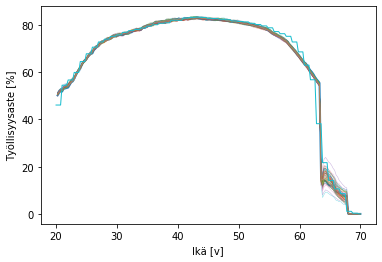

best_emp 7
Vaikutus työllisyyteen keskiarvo 2066998 htv, mediaani 2067768 htv std 5749 htv
   keskiarvo 2231844 työllistä, mediaani 2231887 työllistä, std 6485 työllistä


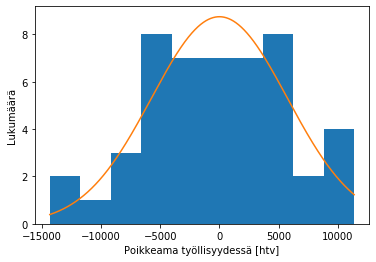

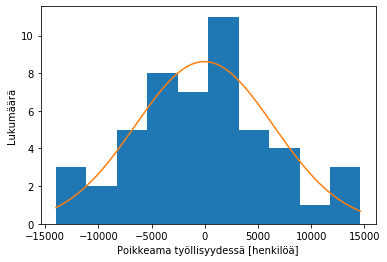

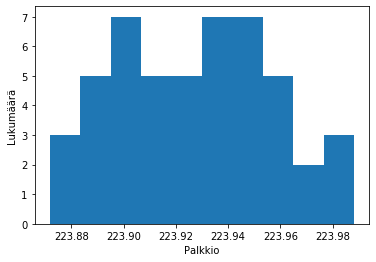

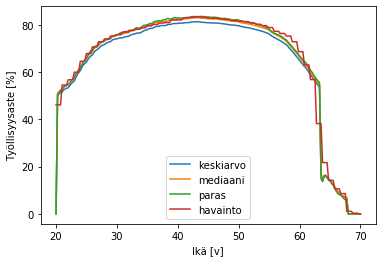

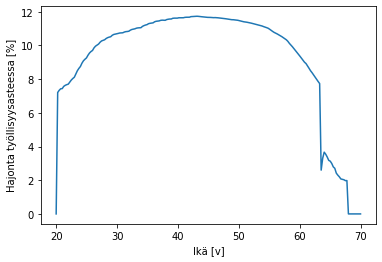

In [9]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.render_distrib(load='results/baseline/distrib_base_v',n=49,stats_results='results/baseline/distrib_stats')

# Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

computing 43
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3328     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00885 |
| total_timesteps    | 0        |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.328    |
| fps                | 3608     |
| nupdates           | 10       |
| policy_entropy     | 0.993    |
| policy_loss        | -1.31    |
| total_timesteps    | 196353   |
| value_

---------------------------------
| explained_variance | 0.998    |
| fps                | 3488     |
| nupdates           | 260      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00993 |
| total_timesteps    | 5650603  |
| value_loss         | 0.0246   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3490     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0136  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0247   |
---------------------------------
done
simulating  best/putki/malli_putki_v143
predicting...


computing 44
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3043     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0106  |
| total_timesteps    | 0        |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.853    |
| fps                | 3365     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.507    |
| total_timesteps    | 196353   |
| value_loss         | 2.12     |
---------------------------------
---------------------------------
| explained_variance | 0.318    |
| fps                | 3316     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | -1.71    |
| total_timesteps    | 414523   |
| value_loss         | 11.5     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3445     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0114  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0145   |
---------------------------------
done
simulating  best/putki/malli_putki_v144
predicting...


computing 45
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3404     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0146  |
| total_timesteps    | 0        |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.698    |
| fps                | 3653     |
| nupdates           | 10       |
| policy_entropy     | 0.984    |
| policy_loss        | 0.982    |
| total_timesteps    | 196353   |
| value_loss         | 4.86     |
---------------------------------
---------------------------------
| explained_variance | 0.872    |
| fps                | 3595     |
| nupdates           | 20       |
| policy_entropy     | 0.951    |
| policy_loss        | -0.394   |
| total_timesteps    | 414523   |
| value_loss         | 1.74     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3461     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0149  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0102   |
---------------------------------
done
simulating  best/putki/malli_putki_v145
predicting...


computing 46
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3427     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0149  |
| total_timesteps    | 0        |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | -0.163   |
| fps                | 3707     |
| nupdates           | 10       |
| policy_entropy     | 0.994    |
| policy_loss        | -1.81    |
| total_timesteps    | 196353   |
| value_loss         | 17.9     |
---------------------------------
---------------------------------
| explained_variance | 0.356    |
| fps                | 3642     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.966   |
| total_timesteps    | 414523   |
| value_loss         | 8.81     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3566     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0097  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0177   |
---------------------------------
done
simulating  best/putki/malli_putki_v146
predicting...


computing 47
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3405     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0122  |
| total_timesteps    | 0        |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.929    |
| fps                | 3704     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.324   |
| total_timesteps    | 196353   |
| value_loss         | 0.94     |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 3643     |
| nupdates           | 20       |
| policy_entropy     | 0.971    |
| policy_loss        | 0.0273   |
| total_timesteps    | 414523   |
| value_loss         | 0.529    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3577     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00578 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0143   |
---------------------------------
done
simulating  best/putki/malli_putki_v147
predicting...


computing 48
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3397     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.017   |
| total_timesteps    | 0        |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.873    |
| fps                | 3721     |
| nupdates           | 10       |
| policy_entropy     | 0.999    |
| policy_loss        | 0.589    |
| total_timesteps    | 196353   |
| value_loss         | 1.85     |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 3657     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | 0.0585   |
| total_timesteps    | 414523   |
| value_loss         | 0.631    |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 3578     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0147  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0223   |
---------------------------------
done
simulating  best/putki/malli_putki_v148
predicting...


computing 49
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3386     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0135  |
| total_timesteps    | 0        |
| value_loss         | 0.0137   |
---------------------------------
---------------------------------
| explained_variance | 0.877    |
| fps                | 3686     |
| nupdates           | 10       |
| policy_entropy     | 0.991    |
| policy_loss        | 0.499    |
| total_timesteps    | 196353   |
| value_loss         | 1.74     |
---------------------------------
---------------------------------
| explained_variance | 0.85     |
| fps                | 3644     |
| nupdates           | 20       |
| policy_entropy     | 0.973    |
| policy_loss        | -0.546   |
| total_timesteps    | 414523   |
| value_loss         | 2.26     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3576     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0109  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0132   |
---------------------------------
done
simulating  best/putki/malli_putki_v149
predicting...


best_emp 15
Vaikutus työllisyyteen keskiarvo 2071360 htv, mediaani 2071124 htv std 6289 htv
   keskiarvo 2236260 työllistä, mediaani 2236017 työllistä, std 6269 työllistä


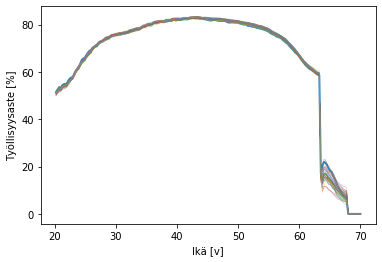

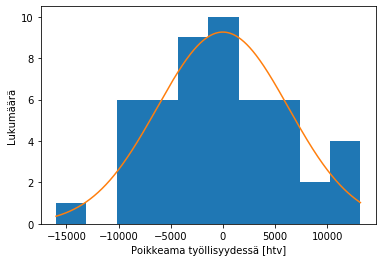

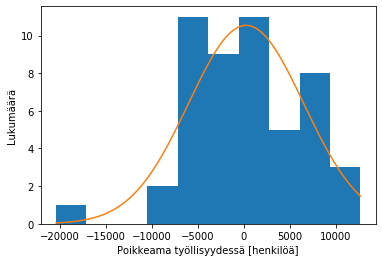

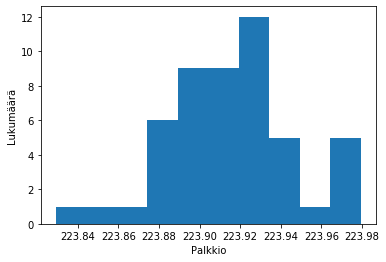

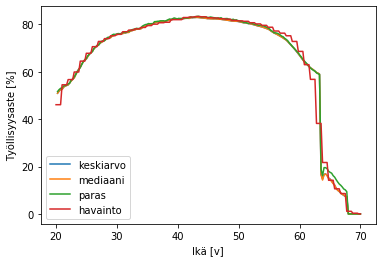

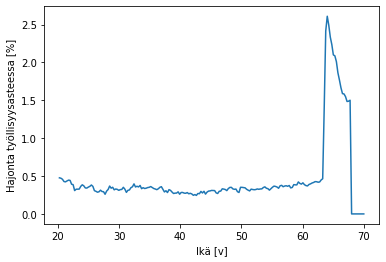

NameError: name 'cc2' is not defined

In [7]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
poistomalli='best/putki/malli_putki'
cc1_putki.run_distrib(n=50,startn=43,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=poistomalli,plot=True,cont=True,start_from=perusmalli,results='results/putki/distrib_poisto',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)
cc2.render_distrib(load='results/putki/distrib_poisto_v',n=2,startn=0,stats_results='results/putki/distrib_poisto_stats')

In [ ]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
#cc1_putki_b.render_distrib(load='results/putki/distrib_poisto_v')
cc1_putki_b.compare_distrib('results/putki/distrib_base_v','results/putki/distrib_poisto_v')                    


# Porrastus

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

computing 43
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1705     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00497 |
| total_timesteps    | 0        |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.865    |
| fps                | 3019     |
| nupdates           | 10       |
| policy_entropy     | 0.998    |
| policy_loss        | -0.109   |
| total_timesteps    | 21825    |
| value_l

---------------------------------
| explained_variance | 0.999    |
| fps                | 2706     |
| nupdates           | 260      |
| policy_entropy     | 0.981    |
| policy_loss        | -0.00769 |
| total_timesteps    | 628075   |
| value_loss         | 0.00944  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2709     |
| nupdates           | 270      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0149  |
| total_timesteps    | 652325   |
| value_loss         | 0.0175   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2712      |
| nupdates           | 280       |
| policy_entropy     | 1.07      |
| policy_loss        | -0.000738 |
| total_timesteps    | 676575    |
| value_loss         | 0.0135    |
----------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 530      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0203  |
| total_timesteps    | 1282825  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2745     |
| nupdates           | 540      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0235  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0687   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2746     |
| nupdates           | 550      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0348  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0297   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.998    |
| fps                | 2762     |
| nupdates           | 800      |
| policy_entropy     | 0.969    |
| policy_loss        | -0.00558 |
| total_timesteps    | 1937575  |
| value_loss         | 0.0238   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2762     |
| nupdates           | 810      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0246  |
| total_timesteps    | 1961825  |
| value_loss         | 0.00969  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2762     |
| nupdates           | 820      |
| policy_entropy     | 0.969    |
| policy_loss        | -0.00826 |
| total_timesteps    | 1986075  |
| value_loss         | 0.031    |
---------------------------------
----------------------------------
| explained_variance | 0.998     |
| fps       

---------------------------------
| explained_variance | 0.999    |
| fps                | 2768     |
| nupdates           | 1070     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0161  |
| total_timesteps    | 2592325  |
| value_loss         | 0.00894  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2769     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0215  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0148   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2769     |
| nupdates           | 1090     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00378  |
| total_timesteps    | 2640825  |
| value_loss         | 0.023    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2773     |
| nupdates           | 1340     |
| policy_entropy     | 1        |
| policy_loss        | -0.00836 |
| total_timesteps    | 3247075  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2773     |
| nupdates           | 1350     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0214  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2774     |
| nupdates           | 1360     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00642 |
| total_timesteps    | 3295575  |
| value_loss         | 0.00754  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2778     |
| nupdates           | 1610     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0124  |
| total_timesteps    | 3901825  |
| value_loss         | 0.01     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2779     |
| nupdates           | 1620     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00422 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00824  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2779     |
| nupdates           | 1630     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0161  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00898  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2781     |
| nupdates           | 1880     |
| policy_entropy     | 0.958    |
| policy_loss        | -0.0192  |
| total_timesteps    | 4556575  |
| value_loss         | 0.0157   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2782     |
| nupdates           | 1890     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.00389 |
| total_timesteps    | 4580825  |
| value_loss         | 0.00612  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2782     |
| nupdates           | 1900     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0139  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2785     |
| nupdates           | 2150     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0178  |
| total_timesteps    | 5211325  |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2785     |
| nupdates           | 2160     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0131  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00677  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2785     |
| nupdates           | 2170     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.014   |
| total_timesteps    | 5259825  |
| value_loss         | 0.0076   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2765     |
| nupdates           | 2420     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00858 |
| total_timesteps    | 5866075  |
| value_loss         | 0.00573  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2764     |
| nupdates           | 2430     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0163  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00843  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2763     |
| nupdates           | 2440     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.014   |
| total_timesteps    | 5914575  |
| value_loss         | 0.00873  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 44
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1975     |
| nupdates           | 1        |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0118  |
| total_timesteps    | 0        |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.747    |
| fps                | 3373     |
| nupdates           | 10       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.69     |
| total_timesteps    | 21825    |
| value_loss         | 3.63     |
---------------------------------
---------------------------------
| explained_variance | 0.887    |
| fps                | 3019     |
| nupdates           | 20       |
| policy_entropy     | 1.04     |
| policy_loss        | -0.488   |
| total_timesteps    | 46075    |
| value_loss         | 1.65     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2708     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0247  |
| total_timesteps    | 652325   |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2710     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00116 |
| total_timesteps    | 676575   |
| value_loss         | 0.0309   |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2712     |
| nupdates           | 290      |
| policy_entropy     | 0.978    |
| policy_loss        | -0.0415  |
| total_timesteps    | 700825   |
| value_loss         | 0.127    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 540      |
| policy_entropy     | 0.977    |
| policy_loss        | -0.011   |
| total_timesteps    | 1307075  |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 550      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0151  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0176   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 560      |
| policy_entropy     | 0.97     |
| policy_loss        | 0.000828 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2756     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | 0.0032   |
| total_timesteps    | 1961825  |
| value_loss         | 0.0192   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2757     |
| nupdates           | 820      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00297 |
| total_timesteps    | 1986075  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2757     |
| nupdates           | 830      |
| policy_entropy     | 0.95     |
| policy_loss        | -0.0343  |
| total_timesteps    | 2010325  |
| value_loss         | 0.051    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2767     |
| nupdates           | 1080     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0116  |
| total_timesteps    | 2616575  |
| value_loss         | 0.00807  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2767     |
| nupdates           | 1090     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0109  |
| total_timesteps    | 2640825  |
| value_loss         | 0.00758  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2767     |
| nupdates           | 1100     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00433 |
| total_timesteps    | 2665075  |
| value_loss         | 0.00999  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2773     |
| nupdates           | 1350     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0138  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0328   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2773     |
| nupdates           | 1360     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0274  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00916  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2773     |
| nupdates           | 1370     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0111  |
| total_timesteps    | 3319825  |
| value_loss         | 0.00734  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 1620     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0153  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2757     |
| nupdates           | 1630     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00142 |
| total_timesteps    | 3950325  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2755     |
| nupdates           | 1640     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0174  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 1890     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0106  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00751  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 1900     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0283  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00995  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1910     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0222  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2739     |
| nupdates           | 2160     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.00423 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00534  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00261  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00673  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 2180     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0125  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00814  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

----------------------------------
| explained_variance | 0.999     |
| fps                | 2747      |
| nupdates           | 2430      |
| policy_entropy     | 1.08      |
| policy_loss        | -0.000512 |
| total_timesteps    | 5890325   |
| value_loss         | 0.00709   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2440     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0239  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2450     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0238  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0118   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

computing 45
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1839     |
| nupdates           | 1        |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0086  |
| total_timesteps    | 0        |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.832    |
| fps                | 3311     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.583   |
| total_timesteps    | 21825    |
| value_loss         | 2.51     |
---------------------------------
---------------------------------
| explained_variance | 0.925    |
| fps                | 3008     |
| nupdates           | 20       |
| policy_entropy     | 0.945    |
| policy_loss        | 0.288    |
| total_timesteps    | 46075    |
| value_loss         | 0.968    |
-------------------------------

---------------------------------
| explained_variance | 0.991    |
| fps                | 2689     |
| nupdates           | 270      |
| policy_entropy     | 0.984    |
| policy_loss        | -0.00755 |
| total_timesteps    | 652325   |
| value_loss         | 0.113    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2692     |
| nupdates           | 280      |
| policy_entropy     | 1        |
| policy_loss        | -0.00372 |
| total_timesteps    | 676575   |
| value_loss         | 0.0295   |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2694     |
| nupdates           | 290      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0224  |
| total_timesteps    | 700825   |
| value_loss         | 0.1      |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2719     |
| nupdates           | 540      |
| policy_entropy     | 0.996    |
| policy_loss        | 0.00911  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00888 |
| total_timesteps    | 1331325  |
| value_loss         | 0.00994  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2722     |
| nupdates           | 560      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0321  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2701     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0086  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2698     |
| nupdates           | 820      |
| policy_entropy     | 1.06     |
| policy_loss        | 0.0022   |
| total_timesteps    | 1986075  |
| value_loss         | 0.0269   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2696     |
| nupdates           | 830      |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0184  |
| total_timesteps    | 2010325  |
| value_loss         | 0.00934  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2679     |
| nupdates           | 1080     |
| policy_entropy     | 1.06     |
| policy_loss        | 0.00209  |
| total_timesteps    | 2616575  |
| value_loss         | 0.00882  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2679     |
| nupdates           | 1090     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.00135  |
| total_timesteps    | 2640825  |
| value_loss         | 0.01     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2680     |
| nupdates           | 1100     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0109  |
| total_timesteps    | 2665075  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2677     |
| nupdates           | 1350     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0118  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00804  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2677     |
| nupdates           | 1360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00377 |
| total_timesteps    | 3295575  |
| value_loss         | 0.00918  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2677     |
| nupdates           | 1370     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0151  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2670     |
| nupdates           | 1620     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.00853 |
| total_timesteps    | 3926075  |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2670     |
| nupdates           | 1630     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00584  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2668     |
| nupdates           | 1640     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0113  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2661     |
| nupdates           | 1890     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00862 |
| total_timesteps    | 4580825  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2662     |
| nupdates           | 1900     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0142  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00754  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2662     |
| nupdates           | 1910     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0262  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00954  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2673     |
| nupdates           | 2160     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.011   |
| total_timesteps    | 5235575  |
| value_loss         | 0.00966  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2673     |
| nupdates           | 2170     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00902 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00778  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2673     |
| nupdates           | 2180     |
| policy_entropy     | 0.979    |
| policy_loss        | -0.0187  |
| total_timesteps    | 5284075  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2679     |
| nupdates           | 2430     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0065  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2679     |
| nupdates           | 2440     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.008   |
| total_timesteps    | 5914575  |
| value_loss         | 0.00529  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2679     |
| nupdates           | 2450     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0152  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0081   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 46
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1930     |
| nupdates           | 1        |
| policy_entropy     | 0.977    |
| policy_loss        | -0.015   |
| total_timesteps    | 0        |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.885    |
| fps                | 3369     |
| nupdates           | 10       |
| policy_entropy     | 1.09     |
| policy_loss        | 0.493    |
| total_timesteps    | 21825    |
| value_loss         | 1.58     |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 3024     |
| nupdates           | 20       |
| policy_entropy     | 0.96     |
| policy_loss        | -0.211   |
| total_timesteps    | 46075    |
| value_loss         | 0.228    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2690     |
| nupdates           | 270      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0352  |
| total_timesteps    | 652325   |
| value_loss         | 0.0166   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2692     |
| nupdates           | 280      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00147 |
| total_timesteps    | 676575   |
| value_loss         | 0.0164   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2694     |
| nupdates           | 290      |
| policy_entropy     | 0.984    |
| policy_loss        | -0.0199  |
| total_timesteps    | 700825   |
| value_loss         | 0.0211   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2719     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00407  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0197   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2719     |
| nupdates           | 550      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0291  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2720     |
| nupdates           | 560      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0154  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0271   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00313 |
| total_timesteps    | 1961825  |
| value_loss         | 0.00815  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 820      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0133  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 830      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0155  |
| total_timesteps    | 2010325  |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2713     |
| nupdates           | 1080     |
| policy_entropy     | 0.971    |
| policy_loss        | 0.0321   |
| total_timesteps    | 2616575  |
| value_loss         | 0.189    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2714     |
| nupdates           | 1090     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0338  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2714     |
| nupdates           | 1100     |
| policy_entropy     | 1.04     |
| policy_loss        | 0.0129   |
| total_timesteps    | 2665075  |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2706     |
| nupdates           | 1350     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.00262 |
| total_timesteps    | 3271325  |
| value_loss         | 0.0289   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2705     |
| nupdates           | 1360     |
| policy_entropy     | 0.972    |
| policy_loss        | -0.0148  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00976  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2704     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0146  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2687     |
| nupdates           | 1620     |
| policy_entropy     | 1        |
| policy_loss        | -0.0105  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00961  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2687     |
| nupdates           | 1630     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00746 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00677  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2687     |
| nupdates           | 1640     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00139  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00986  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2675     |
| nupdates           | 1890     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0177  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00929  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2674     |
| nupdates           | 1900     |
| policy_entropy     | 1        |
| policy_loss        | -0.00226 |
| total_timesteps    | 4605075  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2674     |
| nupdates           | 1910     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0186  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0223   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2674     |
| nupdates           | 2160     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0266  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0174   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2674     |
| nupdates           | 2170     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00886 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00872  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2674     |
| nupdates           | 2180     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.00437 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00679  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2677     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.019   |
| total_timesteps    | 5890325  |
| value_loss         | 0.00947  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2677     |
| nupdates           | 2440     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.019   |
| total_timesteps    | 5914575  |
| value_loss         | 0.00908  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2677     |
| nupdates           | 2450     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0219  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00835  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 47
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1903     |
| nupdates           | 1        |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00751 |
| total_timesteps    | 0        |
| value_loss         | 0.00889  |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 3327     |
| nupdates           | 10       |
| policy_entropy     | 0.988    |
| policy_loss        | -0.299   |
| total_timesteps    | 21825    |
| value_loss         | 0.635    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2988     |
| nupdates           | 20       |
| policy_entropy     | 1.04     |
| policy_loss        | 0.00316  |
| total_timesteps    | 46075    |
| value_loss         | 0.125    |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 2631     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | 0.00234  |
| total_timesteps    | 652325   |
| value_loss         | 0.02     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2635     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0111  |
| total_timesteps    | 676575   |
| value_loss         | 0.0089   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2638     |
| nupdates           | 290      |
| policy_entropy     | 1        |
| policy_loss        | -0.0102  |
| total_timesteps    | 700825   |
| value_loss         | 0.0213   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2682     |
| nupdates           | 540      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00647 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0137   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2683     |
| nupdates           | 550      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0219  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0118   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2684     |
| nupdates           | 560      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0236  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2697     |
| nupdates           | 810      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0173  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2695     |
| nupdates           | 820      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.013   |
| total_timesteps    | 1986075  |
| value_loss         | 0.0178   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2693     |
| nupdates           | 830      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.019   |
| total_timesteps    | 2010325  |
| value_loss         | 0.00965  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2686     |
| nupdates           | 1080     |
| policy_entropy     | 1        |
| policy_loss        | -0.00878 |
| total_timesteps    | 2616575  |
| value_loss         | 0.0152   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2686     |
| nupdates           | 1090     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.0144   |
| total_timesteps    | 2640825  |
| value_loss         | 0.00759  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2687     |
| nupdates           | 1100     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0156  |
| total_timesteps    | 2665075  |
| value_loss         | 0.00745  |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2697     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0143  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00911  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2697     |
| nupdates           | 1360     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0194  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0176   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2698     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00942 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00911  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2705     |
| nupdates           | 1620     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0148  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2705     |
| nupdates           | 1630     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00497 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00928  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2705     |
| nupdates           | 1640     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.00807 |
| total_timesteps    | 3974575  |
| value_loss         | 0.015    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2711     |
| nupdates           | 1890     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0112  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00946  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2711     |
| nupdates           | 1900     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.00571 |
| total_timesteps    | 4605075  |
| value_loss         | 0.0072   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2711     |
| nupdates           | 1910     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0107  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00788  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2715     |
| nupdates           | 2160     |
| policy_entropy     | 0.984    |
| policy_loss        | -0.00454 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00874  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2715     |
| nupdates           | 2170     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0089  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00741  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2715     |
| nupdates           | 2180     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0119  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00577  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

----------------------------------
| explained_variance | 0.999     |
| fps                | 2718      |
| nupdates           | 2430      |
| policy_entropy     | 1.01      |
| policy_loss        | -0.000656 |
| total_timesteps    | 5890325   |
| value_loss         | 0.00628   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2718     |
| nupdates           | 2440     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00994 |
| total_timesteps    | 5914575  |
| value_loss         | 0.0086   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2719     |
| nupdates           | 2450     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0185  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00574  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

computing 48
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1661     |
| nupdates           | 1        |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00332 |
| total_timesteps    | 0        |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 3027     |
| nupdates           | 10       |
| policy_entropy     | 0.978    |
| policy_loss        | -0.323   |
| total_timesteps    | 21825    |
| value_loss         | 0.737    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2735     |
| nupdates           | 20       |
| policy_entropy     | 1.04     |
| policy_loss        | 0.0786   |
| total_timesteps    | 46075    |
| value_loss         | 0.334    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2597     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00285 |
| total_timesteps    | 652325   |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2602     |
| nupdates           | 280      |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0138  |
| total_timesteps    | 676575   |
| value_loss         | 0.0155   |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2606     |
| nupdates           | 290      |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0114  |
| total_timesteps    | 700825   |
| value_loss         | 0.173    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2669     |
| nupdates           | 540      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0251  |
| total_timesteps    | 1307075  |
| value_loss         | 0.015    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2670     |
| nupdates           | 550      |
| policy_entropy     | 0.993    |
| policy_loss        | -0.00928 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2672     |
| nupdates           | 560      |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0426  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0739   |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2681     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.024   |
| total_timesteps    | 1961825  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2682     |
| nupdates           | 820      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00865 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0215   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2683     |
| nupdates           | 830      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0335  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0152   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2698     |
| nupdates           | 1080     |
| policy_entropy     | 0.972    |
| policy_loss        | -0.00649 |
| total_timesteps    | 2616575  |
| value_loss         | 0.0186   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2698     |
| nupdates           | 1090     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0151  |
| total_timesteps    | 2640825  |
| value_loss         | 0.00928  |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2699     |
| nupdates           | 1100     |
| policy_entropy     | 0.977    |
| policy_loss        | -0.0319  |
| total_timesteps    | 2665075  |
| value_loss         | 0.066    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2709     |
| nupdates           | 1350     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0141  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00759  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2710     |
| nupdates           | 1360     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0076  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00824  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2710     |
| nupdates           | 1370     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0185  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2717     |
| nupdates           | 1620     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00558 |
| total_timesteps    | 3926075  |
| value_loss         | 0.0097   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2718     |
| nupdates           | 1630     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0089  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2718     |
| nupdates           | 1640     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0303  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 1890     |
| policy_entropy     | 1        |
| policy_loss        | -0.0019  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00915  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 1900     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0291  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0155   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 1910     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.00684 |
| total_timesteps    | 4629325  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 2160     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0291  |
| total_timesteps    | 5235575  |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 2170     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0215  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00789  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 2180     |
| policy_entropy     | 1        |
| policy_loss        | -0.014   |
| total_timesteps    | 5284075  |
| value_loss         | 0.00797  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 2430     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0261  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 2440     |
| policy_entropy     | 1.12     |
| policy_loss        | -0.032   |
| total_timesteps    | 5914575  |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 2450     |
| policy_entropy     | 0.956    |
| policy_loss        | -0.00378 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00811  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 49
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1921     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0157  |
| total_timesteps    | 0        |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.912    |
| fps                | 3319     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.365    |
| total_timesteps    | 21825    |
| value_loss         | 1.2      |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 2995     |
| nupdates           | 20       |
| policy_entropy     | 0.968    |
| policy_loss        | -0.338   |
| total_timesteps    | 46075    |
| value_loss         | 0.81     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 270      |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0119  |
| total_timesteps    | 652325   |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2728     |
| nupdates           | 280      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0118  |
| total_timesteps    | 676575   |
| value_loss         | 0.0291   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 290      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0162  |
| total_timesteps    | 700825   |
| value_loss         | 0.0157   |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2725     |
| nupdates           | 540      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00902 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0197   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 550      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00942 |
| total_timesteps    | 1331325  |
| value_loss         | 0.00915  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 560      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00476 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2723     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0119  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0071   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2723     |
| nupdates           | 820      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0028   |
| total_timesteps    | 1986075  |
| value_loss         | 0.0055   |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2723     |
| nupdates           | 830      |
| policy_entropy     | 0.961    |
| policy_loss        | 8.38e-05 |
| total_timesteps    | 2010325  |
| value_loss         | 0.195    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2714     |
| nupdates           | 1080     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0344  |
| total_timesteps    | 2616575  |
| value_loss         | 0.00877  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2713      |
| nupdates           | 1090      |
| policy_entropy     | 0.987     |
| policy_loss        | -0.000203 |
| total_timesteps    | 2640825   |
| value_loss         | 0.0136    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2711     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0333  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2675     |
| nupdates           | 1350     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0201  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00716  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2674     |
| nupdates           | 1360     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0154  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00625  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2674     |
| nupdates           | 1370     |
| policy_entropy     | 0.957    |
| policy_loss        | -0.015   |
| total_timesteps    | 3319825  |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2686     |
| nupdates           | 1620     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0243  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0177   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2686     |
| nupdates           | 1630     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0193  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2687     |
| nupdates           | 1640     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00795 |
| total_timesteps    | 3974575  |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2698     |
| nupdates           | 1890     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0295  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2699     |
| nupdates           | 1900     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0168  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00638  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2699      |
| nupdates           | 1910      |
| policy_entropy     | 0.961     |
| policy_loss        | -9.18e-05 |
| total_timesteps    | 4629325   |
| value_loss         | 0.0104    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

----------------------------------
| explained_variance | 0.999     |
| fps                | 2708      |
| nupdates           | 2160      |
| policy_entropy     | 0.978     |
| policy_loss        | -0.000267 |
| total_timesteps    | 5235575   |
| value_loss         | 0.00784   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2709     |
| nupdates           | 2170     |
| policy_entropy     | 1        |
| policy_loss        | -0.00613 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00654  |
---------------------------------
----------------------------------
| explained_variance | 1         |
| fps                | 2709      |
| nupdates           | 2180      |
| policy_entropy     | 1.02      |
| policy_loss        | -0.000401 |
| total_timesteps    | 5284075   |
| value_loss         | 0.00476   |
----------------------------------
---------------------------------
| explained_variance | 0.999  

---------------------------------
| explained_variance | 0.999    |
| fps                | 2716     |
| nupdates           | 2430     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0225  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2716     |
| nupdates           | 2440     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0243  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2716     |
| nupdates           | 2450     |
| policy_entropy     | 1        |
| policy_loss        | -0.011   |
| total_timesteps    | 5938825  |
| value_loss         | 0.00815  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

best_emp 3
Vaikutus työllisyyteen keskiarvo 2091650 htv, mediaani 2092269 htv std 6798 htv
   keskiarvo 2259792 työllistä, mediaani 2259098 työllistä, std 6605 työllistä


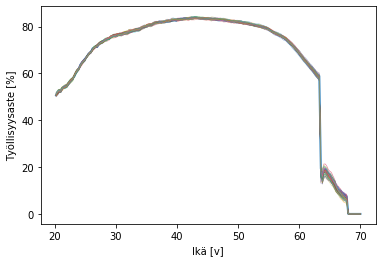

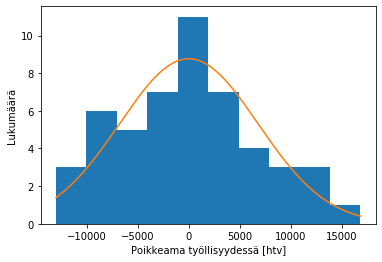

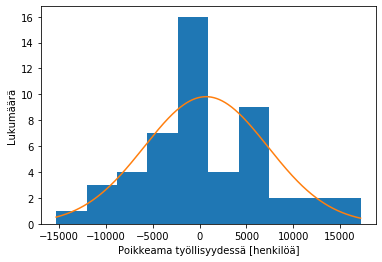

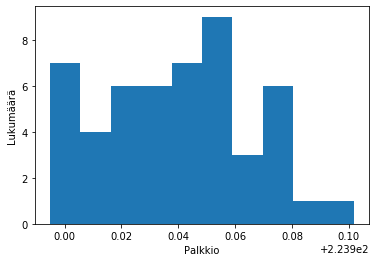

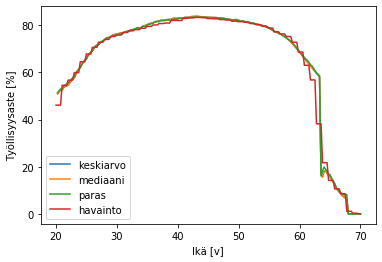

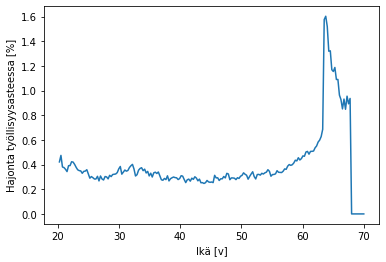

In [6]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,randomness=randomness,porrasta_putki=True)
porrasmalli='best/porrastus/malli_porrastus'
cc2_porras.run_distrib(n=50,startn=43,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,
                save=porrasmalli,plot=True,cont=True,start_from=perusmalli,results='results/porrastus/distrib_porras',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True



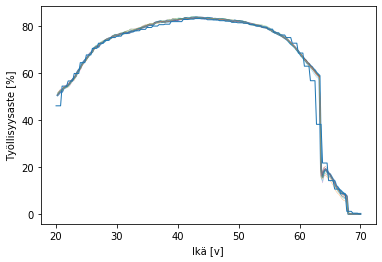

best_emp 3
Vaikutus työllisyyteen keskiarvo 2092404 htv, mediaani 2091086 htv std 5225 htv
   keskiarvo 2260802 työllistä, mediaani 2258908 työllistä, std 4337 työllistä


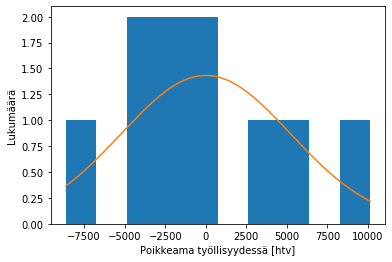

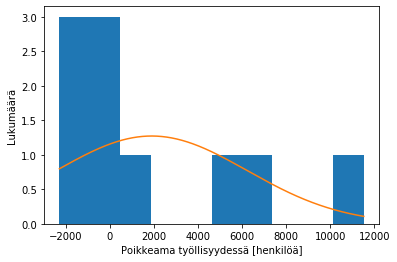

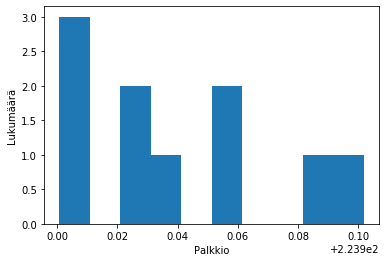

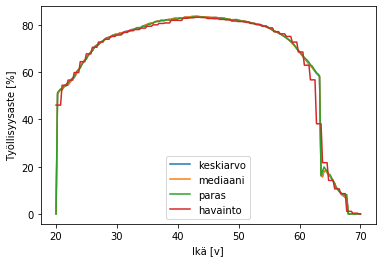

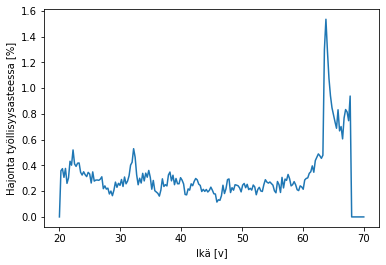

Vaikutus työllisyysasteeseen 21187.0 htv


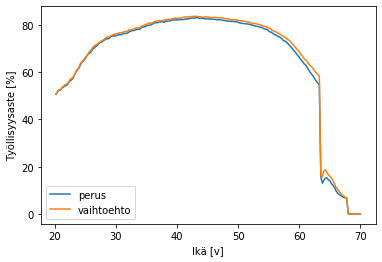

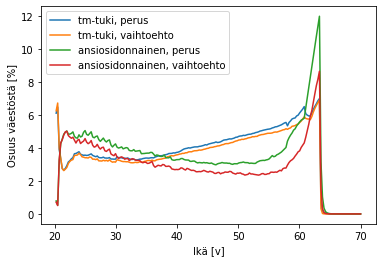

In [10]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.render_distrib(load='results/porrastus/distrib_porras_v',n=10,startn=0,stats_results='results/porrastus/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/distrib_stats','results/porrastus/distrib_porras_stats')

# Porrastus ilman vaikutusta putkeen

In [4]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,randomness=randomness,porrasta_putki=False)
porrasmalli='best/porrastus_eiputki/malli_porrastus'
cc2_porras.run_distrib(n=50,startn=6,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,verbose=False,
                save=porrasmalli,plot=True,cont=True,start_from=perusmalli,results='results/porrastus_eiputki/distrib_porras',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

computing 1
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.999    |
| fps                | 2003     |
| nupdates           | 1        |
| policy_entropy     | 0.989    |
| policy_loss        | 0.000697 |
| total_timesteps    | 0        |
| value_loss         | 0.0143   |
------------------------------

---------------------------------
| explained_variance | 0.996    |
| fps                | 2857     |
| nupdates           | 60       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.000434 |
| total_timesteps    | 143075   |
| value_loss         | 0.0487   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2843     |
| nupdates           | 70       |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0187  |
| total_timesteps    | 167325   |
| value_loss         | 0.0241   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2834     |
| nupdates           | 80       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0106   |
| total_timesteps    | 191575   |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2791     |
| nupdates           | 330      |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0115  |
| total_timesteps    | 797825   |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2792     |
| nupdates           | 340      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0164  |
| total_timesteps    | 822075   |
| value_loss         | 0.00967  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2792     |
| nupdates           | 350      |
| policy_entropy     | 1.07     |
| policy_loss        | 0.00208  |
| total_timesteps    | 846325   |
| value_loss         | 0.0148   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2804     |
| nupdates           | 600      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0102  |
| total_timesteps    | 1452575  |
| value_loss         | 0.00877  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2804     |
| nupdates           | 610      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00946 |
| total_timesteps    | 1476825  |
| value_loss         | 0.00869  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2805     |
| nupdates           | 620      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0249  |
| total_timesteps    | 1501075  |
| value_loss         | 0.0171   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2813     |
| nupdates           | 870      |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0258  |
| total_timesteps    | 2107325  |
| value_loss         | 0.048    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2813     |
| nupdates           | 880      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0201  |
| total_timesteps    | 2131575  |
| value_loss         | 0.0088   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2813     |
| nupdates           | 890      |
| policy_entropy     | 1        |
| policy_loss        | -0.0371  |
| total_timesteps    | 2155825  |
| value_loss         | 0.0183   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1140     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0113  |
| total_timesteps    | 2762075  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1150     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.023   |
| total_timesteps    | 2786325  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2816     |
| nupdates           | 1160     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0172  |
| total_timesteps    | 2810575  |
| value_loss         | 0.00715  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2820     |
| nupdates           | 1410     |
| policy_entropy     | 0.962    |
| policy_loss        | -0.00265 |
| total_timesteps    | 3416825  |
| value_loss         | 0.00973  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2821     |
| nupdates           | 1420     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0292  |
| total_timesteps    | 3441075  |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2821     |
| nupdates           | 1430     |
| policy_entropy     | 1        |
| policy_loss        | -0.0155  |
| total_timesteps    | 3465325  |
| value_loss         | 0.01     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1778     |
| nupdates           | 1680     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.014   |
| total_timesteps    | 4071575  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1782     |
| nupdates           | 1690     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.015   |
| total_timesteps    | 4095825  |
| value_loss         | 0.0096   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1786     |
| nupdates           | 1700     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.00525 |
| total_timesteps    | 4120075  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1876     |
| nupdates           | 1950     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00584 |
| total_timesteps    | 4726325  |
| value_loss         | 0.00946  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1879     |
| nupdates           | 1960     |
| policy_entropy     | 1        |
| policy_loss        | -0.0115  |
| total_timesteps    | 4750575  |
| value_loss         | 0.00792  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1883     |
| nupdates           | 1970     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0087  |
| total_timesteps    | 4774825  |
| value_loss         | 0.00672  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1958     |
| nupdates           | 2220     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0102  |
| total_timesteps    | 5381075  |
| value_loss         | 0.0182   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1961     |
| nupdates           | 2230     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0107  |
| total_timesteps    | 5405325  |
| value_loss         | 0.00785  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1964     |
| nupdates           | 2240     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0102  |
| total_timesteps    | 5429575  |
| value_loss         | 0.0063   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 2
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2006     |
| nupdates           | 1        |
| policy_entropy     | 0.981    |
| policy_loss        | -0.00839 |
| total_timesteps    | 0        |
| value_loss         | 0.0173   |
---------------------------------
---------------------------------
| explained_variance | 0.916    |
| fps                | 3426     |
| nupdates           | 10       |
| policy_entropy     | 0.976    |
| policy_loss        | 0.405    |
| total_timesteps    | 21825    |
| value_loss         | 1.26     |
---------------------------------
---------------------------------
| explained_variance | 0.905    |
| fps                | 3083     |
| nupdates           | 20       |
| policy_entropy     | 0.962    |
| policy_loss        | 0.0215   |
| total_timesteps    | 46075    |
| value_loss         | 1.17     |
--------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2823     |
| nupdates           | 270      |
| policy_entropy     | 0.989    |
| policy_loss        | -0.00528 |
| total_timesteps    | 652325   |
| value_loss         | 0.00852  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2823     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00809  |
| total_timesteps    | 676575   |
| value_loss         | 0.0357   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2823     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0191  |
| total_timesteps    | 700825   |
| value_loss         | 0.0199   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2826     |
| nupdates           | 540      |
| policy_entropy     | 0.995    |
| policy_loss        | 0.0136   |
| total_timesteps    | 1307075  |
| value_loss         | 0.0542   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2826     |
| nupdates           | 550      |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0215  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0283   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2826     |
| nupdates           | 560      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0259  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2827     |
| nupdates           | 810      |
| policy_entropy     | 0.976    |
| policy_loss        | -0.00963 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0213   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2827     |
| nupdates           | 820      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0132  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0512   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2827     |
| nupdates           | 830      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00017  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0192   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2828     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0179  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2828     |
| nupdates           | 1090     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0103  |
| total_timesteps    | 2640825  |
| value_loss         | 0.00968  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2828     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0236  |
| total_timesteps    | 2665075  |
| value_loss         | 0.019    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 1350     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0136  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00884  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2809      |
| nupdates           | 1360      |
| policy_entropy     | 0.995     |
| policy_loss        | -0.000892 |
| total_timesteps    | 3295575   |
| value_loss         | 0.0102    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0189  |
| total_timesteps    | 3319825  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2812     |
| nupdates           | 1620     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0195  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2812     |
| nupdates           | 1630     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0255  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0192   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2812     |
| nupdates           | 1640     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00361 |
| total_timesteps    | 3974575  |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2806     |
| nupdates           | 1890     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0192  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0143   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2806     |
| nupdates           | 1900     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0156  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2806     |
| nupdates           | 1910     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00658 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00669  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 2160     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.00803 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00767  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 2170     |
| policy_entropy     | 0.977    |
| policy_loss        | -0.00385 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00816  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 2180     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0148  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2813     |
| nupdates           | 2430     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0137  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00897  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2813     |
| nupdates           | 2440     |
| policy_entropy     | 0.992    |
| policy_loss        | 0.00494  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00747  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2813     |
| nupdates           | 2450     |
| policy_entropy     | 1        |
| policy_loss        | -0.00158 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00663  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 3
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.998    |
| fps                | 2000     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00111  |
| total_timesteps    | 0        |
| value_loss         | 0.0258   |
---------------------------------
---------------------------------
| explained_variance | 0.83     |
| fps                | 3426     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.611    |
| total_timesteps    | 21825    |
| value_loss         | 2.56     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 3068     |
| nupdates           | 20       |
| policy_entropy     | 0.997    |
| policy_loss        | -0.114   |
| total_timesteps    | 46075    |
| value_loss         | 0.279    |
--------------------------------

---------------------------------
| explained_variance | 0.997    |
| fps                | 2811     |
| nupdates           | 270      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00551 |
| total_timesteps    | 652325   |
| value_loss         | 0.0358   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2811     |
| nupdates           | 280      |
| policy_entropy     | 0.986    |
| policy_loss        | -0.00929 |
| total_timesteps    | 676575   |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2810     |
| nupdates           | 290      |
| policy_entropy     | 0.968    |
| policy_loss        | -0.00164 |
| total_timesteps    | 700825   |
| value_loss         | 0.0295   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2810     |
| nupdates           | 540      |
| policy_entropy     | 1.08     |
| policy_loss        | 0.00374  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2811     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0215  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0584   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2811     |
| nupdates           | 560      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0207  |
| total_timesteps    | 1355575  |
| value_loss         | 0.057    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2812     |
| nupdates           | 810      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0175  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2812     |
| nupdates           | 820      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.00834 |
| total_timesteps    | 1986075  |
| value_loss         | 0.00538  |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2812     |
| nupdates           | 830      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0251  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0463   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1080     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00378 |
| total_timesteps    | 2616575  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1090     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0204  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1100     |
| policy_entropy     | 1        |
| policy_loss        | -0.0114  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2820     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0146  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2820     |
| nupdates           | 1360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0168  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0363   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2820     |
| nupdates           | 1370     |
| policy_entropy     | 0.994    |
| policy_loss        | 0.000309 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00803  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2824     |
| nupdates           | 1620     |
| policy_entropy     | 1        |
| policy_loss        | -0.00107 |
| total_timesteps    | 3926075  |
| value_loss         | 0.0201   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2824     |
| nupdates           | 1630     |
| policy_entropy     | 1        |
| policy_loss        | -0.0156  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0125   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2824     |
| nupdates           | 1640     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0129  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2828     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0104  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00631  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2828     |
| nupdates           | 1900     |
| policy_entropy     | 0.961    |
| policy_loss        | -0.00392 |
| total_timesteps    | 4605075  |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2828     |
| nupdates           | 1910     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0537  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0965   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2830     |
| nupdates           | 2160     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0182  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2831     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0158  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00695  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2831     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0106  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00786  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2832     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | 0.00543  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00915  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2832     |
| nupdates           | 2440     |
| policy_entropy     | 1        |
| policy_loss        | -0.00315 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00659  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2832     |
| nupdates           | 2450     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0165  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00812  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 4
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1977     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0164  |
| total_timesteps    | 0        |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.368    |
| fps                | 3385     |
| nupdates           | 10       |
| policy_entropy     | 0.966    |
| policy_loss        | -0.283   |
| total_timesteps    | 21825    |
| value_loss         | 7.7      |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 3070     |
| nupdates           | 20       |
| policy_entropy     | 0.985    |
| policy_loss        | -0.016   |
| total_timesteps    | 46075    |
| value_loss         | 0.69     |
--------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2812     |
| nupdates           | 270      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0369  |
| total_timesteps    | 652325   |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2811     |
| nupdates           | 280      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0162  |
| total_timesteps    | 676575   |
| value_loss         | 0.0216   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2811     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0137  |
| total_timesteps    | 700825   |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2807     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0107  |
| total_timesteps    | 1307075  |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2807     |
| nupdates           | 550      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0171  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2807     |
| nupdates           | 560      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00253  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0094   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2808     |
| nupdates           | 810      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0102  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0276   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2808     |
| nupdates           | 820      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0338  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0479   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 830      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0179  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2811     |
| nupdates           | 1080     |
| policy_entropy     | 0.978    |
| policy_loss        | -0.021   |
| total_timesteps    | 2616575  |
| value_loss         | 0.03     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2811     |
| nupdates           | 1090     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0197  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2811     |
| nupdates           | 1100     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0105  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2814     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0188  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2813     |
| nupdates           | 1360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0103  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00657  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2813     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00301 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00864  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1620     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0155  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00856  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1630     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0105  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00862  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2815     |
| nupdates           | 1640     |
| policy_entropy     | 1        |
| policy_loss        | -0.0181  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00665  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2817     |
| nupdates           | 1890     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.025   |
| total_timesteps    | 4580825  |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2817     |
| nupdates           | 1900     |
| policy_entropy     | 0.967    |
| policy_loss        | -0.00404 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00779  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2817     |
| nupdates           | 1910     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0206  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00848  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 2160     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0368  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 2170     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0155  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0118  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00954  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00947 |
| total_timesteps    | 5890325  |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 2440     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00274 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00732  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 2450     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0126  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 5
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2025     |
| nupdates           | 1        |
| policy_entropy     | 0.999    |
| policy_loss        | -0.00599 |
| total_timesteps    | 0        |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.737    |
| fps                | 3377     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | -0.918   |
| total_timesteps    | 21825    |
| value_loss         | 3.73     |
---------------------------------
---------------------------------
| explained_variance | 0.00843  |
| fps                | 3048     |
| nupdates           | 20       |
| policy_entropy     | 0.947    |
| policy_loss        | -0.823   |
| total_timesteps    | 46075    |
| value_loss         | 13.3     |
--------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2801     |
| nupdates           | 270      |
| policy_entropy     | 0.966    |
| policy_loss        | -0.0273  |
| total_timesteps    | 652325   |
| value_loss         | 0.0171   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2801     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00134 |
| total_timesteps    | 676575   |
| value_loss         | 0.00963  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2800     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00958 |
| total_timesteps    | 700825   |
| value_loss         | 0.0174   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2801     |
| nupdates           | 540      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00935 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0075   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2801     |
| nupdates           | 550      |
| policy_entropy     | 0.985    |
| policy_loss        | -0.00521 |
| total_timesteps    | 1331325  |
| value_loss         | 0.00981  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2801     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0113   |
| total_timesteps    | 1355575  |
| value_loss         | 0.0421   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2805     |
| nupdates           | 810      |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0177  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0194   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2806     |
| nupdates           | 820      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0361  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0277   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2806     |
| nupdates           | 830      |
| policy_entropy     | 0.99     |
| policy_loss        | 0.00265  |
| total_timesteps    | 2010325  |
| value_loss         | 0.00785  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2808     |
| nupdates           | 1080     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0178  |
| total_timesteps    | 2616575  |
| value_loss         | 0.00905  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 1090     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.025   |
| total_timesteps    | 2640825  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2809     |
| nupdates           | 1100     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0255  |
| total_timesteps    | 2665075  |
| value_loss         | 0.072    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2811     |
| nupdates           | 1350     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0101  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2811     |
| nupdates           | 1360     |
| policy_entropy     | 0.986    |
| policy_loss        | 0.00535  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0182   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2812     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0116  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0064   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2814     |
| nupdates           | 1620     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0149  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2814     |
| nupdates           | 1630     |
| policy_entropy     | 1        |
| policy_loss        | -0.0103  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0154   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2814     |
| nupdates           | 1640     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0142  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2817     |
| nupdates           | 1890     |
| policy_entropy     | 1        |
| policy_loss        | -0.0068  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00783  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2817     |
| nupdates           | 1900     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00971 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00524  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2817     |
| nupdates           | 1910     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00791 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00788  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2818     |
| nupdates           | 2160     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0176  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00778  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2818     |
| nupdates           | 2170     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0165  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2818     |
| nupdates           | 2180     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0144  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2820     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0219  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2820     |
| nupdates           | 2440     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.00107  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00812  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2820     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0108  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00768  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 6
train...
phase 1


KeyboardInterrupt: 

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True



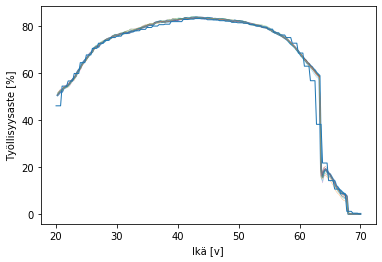

best_emp 3
Vaikutus työllisyyteen keskiarvo 2092404 htv, mediaani 2091086 htv std 5225 htv
   keskiarvo 2260802 työllistä, mediaani 2258908 työllistä, std 4337 työllistä


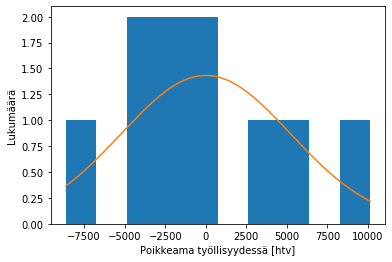

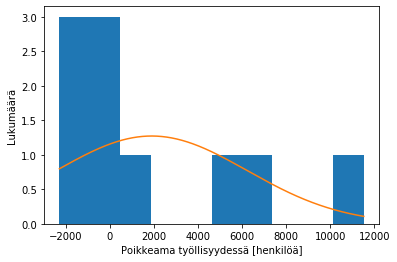

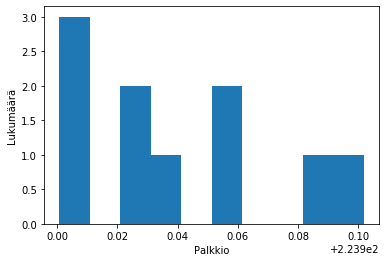

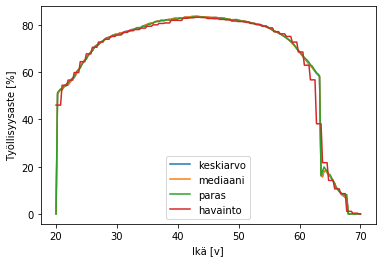

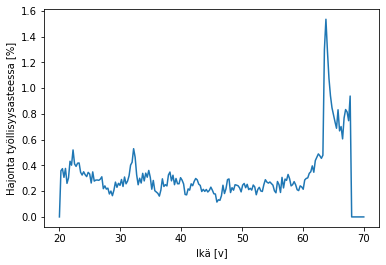

Vaikutus työllisyysasteeseen 21187.0 htv


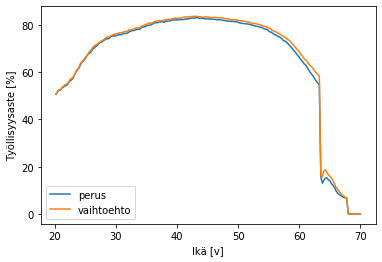

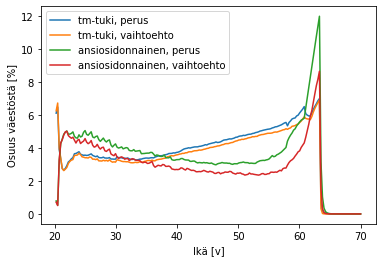

In [10]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.render_distrib(load='results/porrastus_eiputki/distrib_porras_v',n=10,startn=0,stats_results='results/porrastus/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/distrib_stats','results/porrastus_eiputki/distrib_porras_stats')

# TOE 12 kk

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 1.0
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

computing 18
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1905     |
| nupdates           | 1        |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0101  |
| total_timesteps    | 0        |
| value_loss         | 0.0161   |
---------------------------------
---------------------------------
| explained_variance | 0.923    |
| fps                | 3253     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.021   |
| total_timesteps    | 21825    |
| value_l

---------------------------------
| explained_variance | 0.998    |
| fps                | 2691     |
| nupdates           | 260      |
| policy_entropy     | 1        |
| policy_loss        | -0.0174  |
| total_timesteps    | 628075   |
| value_loss         | 0.0265   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2691     |
| nupdates           | 270      |
| policy_entropy     | 0.954    |
| policy_loss        | -0.0072  |
| total_timesteps    | 652325   |
| value_loss         | 0.0298   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2691     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0197  |
| total_timesteps    | 676575   |
| value_loss         | 0.0203   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2687     |
| nupdates           | 530      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.000788 |
| total_timesteps    | 1282825  |
| value_loss         | 0.0186   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2687     |
| nupdates           | 540      |
| policy_entropy     | 0.964    |
| policy_loss        | -0.0253  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0267   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2687     |
| nupdates           | 550      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00361 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0157   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2691     |
| nupdates           | 800      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.00492 |
| total_timesteps    | 1937575  |
| value_loss         | 0.00775  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2691     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0193  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0406   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2691     |
| nupdates           | 820      |
| policy_entropy     | 1        |
| policy_loss        | -0.00975 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2694     |
| nupdates           | 1070     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00769 |
| total_timesteps    | 2592325  |
| value_loss         | 0.01     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2694     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00845 |
| total_timesteps    | 2616575  |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2694     |
| nupdates           | 1090     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00306 |
| total_timesteps    | 2640825  |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2698     |
| nupdates           | 1340     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0031  |
| total_timesteps    | 3247075  |
| value_loss         | 0.0165   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2698     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0152  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0061   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2698     |
| nupdates           | 1360     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0177  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2700     |
| nupdates           | 1610     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0267  |
| total_timesteps    | 3901825  |
| value_loss         | 0.016    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2700     |
| nupdates           | 1620     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0239  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2700     |
| nupdates           | 1630     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0323  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2703     |
| nupdates           | 1880     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.00536 |
| total_timesteps    | 4556575  |
| value_loss         | 0.00999  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2703     |
| nupdates           | 1890     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0252  |
| total_timesteps    | 4580825  |
| value_loss         | 0.015    |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2702      |
| nupdates           | 1900      |
| policy_entropy     | 0.984     |
| policy_loss        | -0.000182 |
| total_timesteps    | 4605075   |
| value_loss         | 0.0104    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2704     |
| nupdates           | 2150     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0147  |
| total_timesteps    | 5211325  |
| value_loss         | 0.00818  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2704     |
| nupdates           | 2160     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0203  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00925  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2704     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00378 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00787  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2706     |
| nupdates           | 2420     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0193  |
| total_timesteps    | 5866075  |
| value_loss         | 0.00837  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2706     |
| nupdates           | 2430     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0269  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2706     |
| nupdates           | 2440     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00447 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00731  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 19
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1830     |
| nupdates           | 1        |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0157  |
| total_timesteps    | 0        |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.324    |
| fps                | 3308     |
| nupdates           | 10       |
| policy_entropy     | 0.942    |
| policy_loss        | -0.595   |
| total_timesteps    | 21825    |
| value_loss         | 8.18     |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2976     |
| nupdates           | 20       |
| policy_entropy     | 1.07     |
| policy_loss        | -0.198   |
| total_timesteps    | 46075    |
| value_loss         | 0.255    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2699     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.03    |
| total_timesteps    | 652325   |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2699     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00137  |
| total_timesteps    | 676575   |
| value_loss         | 0.00674  |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2699     |
| nupdates           | 290      |
| policy_entropy     | 0.979    |
| policy_loss        | 0.0229   |
| total_timesteps    | 700825   |
| value_loss         | 0.0463   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2645     |
| nupdates           | 540      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0331  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0174   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2642     |
| nupdates           | 550      |
| policy_entropy     | 0.979    |
| policy_loss        | -0.0149  |
| total_timesteps    | 1331325  |
| value_loss         | 0.00965  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2638     |
| nupdates           | 560      |
| policy_entropy     | 0.971    |
| policy_loss        | 0.00309  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0292   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2607     |
| nupdates           | 810      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0191  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2608     |
| nupdates           | 820      |
| policy_entropy     | 1.04     |
| policy_loss        | 0.00138  |
| total_timesteps    | 1986075  |
| value_loss         | 0.00733  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2609     |
| nupdates           | 830      |
| policy_entropy     | 1.11     |
| policy_loss        | -0.00221 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2635     |
| nupdates           | 1080     |
| policy_entropy     | 1        |
| policy_loss        | -0.0109  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2636     |
| nupdates           | 1090     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0408  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0222   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2637     |
| nupdates           | 1100     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0165  |
| total_timesteps    | 2665075  |
| value_loss         | 0.00746  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2654     |
| nupdates           | 1350     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00774 |
| total_timesteps    | 3271325  |
| value_loss         | 0.00725  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2655     |
| nupdates           | 1360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.015   |
| total_timesteps    | 3295575  |
| value_loss         | 0.00692  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2655     |
| nupdates           | 1370     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0131  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2668     |
| nupdates           | 1620     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0195  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0058   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2668     |
| nupdates           | 1630     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00832 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00866  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2669     |
| nupdates           | 1640     |
| policy_entropy     | 0.985    |
| policy_loss        | 0.00832  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00906  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2677     |
| nupdates           | 1890     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.028   |
| total_timesteps    | 4580825  |
| value_loss         | 0.00974  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2678     |
| nupdates           | 1900     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0058  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00783  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2678     |
| nupdates           | 1910     |
| policy_entropy     | 0.99     |
| policy_loss        | -0.014   |
| total_timesteps    | 4629325  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2685     |
| nupdates           | 2160     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0245  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2686     |
| nupdates           | 2170     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0123  |
| total_timesteps    | 5259825  |
| value_loss         | 0.01     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2686     |
| nupdates           | 2180     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00944 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00857  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2688     |
| nupdates           | 2430     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.00908 |
| total_timesteps    | 5890325  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2688     |
| nupdates           | 2440     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0198  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00819  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2688     |
| nupdates           | 2450     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0203  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00699  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 20
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1971     |
| nupdates           | 1        |
| policy_entropy     | 1        |
| policy_loss        | -0.0058  |
| total_timesteps    | 0        |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.905    |
| fps                | 3348     |
| nupdates           | 10       |
| policy_entropy     | 0.988    |
| policy_loss        | 0.00503  |
| total_timesteps    | 21825    |
| value_loss         | 1.13     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2996     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.069   |
| total_timesteps    | 46075    |
| value_loss         | 0.246    |
-------------------------------

---------------------------------
| explained_variance | 0.996    |
| fps                | 2726     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0103  |
| total_timesteps    | 652325   |
| value_loss         | 0.0451   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2725     |
| nupdates           | 280      |
| policy_entropy     | 0.976    |
| policy_loss        | -0.0115  |
| total_timesteps    | 676575   |
| value_loss         | 0.0258   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2725     |
| nupdates           | 290      |
| policy_entropy     | 0.976    |
| policy_loss        | -0.013   |
| total_timesteps    | 700825   |
| value_loss         | 0.0323   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2722     |
| nupdates           | 540      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00469 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0251   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2722     |
| nupdates           | 550      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0163  |
| total_timesteps    | 1331325  |
| value_loss         | 0.00986  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2722     |
| nupdates           | 560      |
| policy_entropy     | 0.993    |
| policy_loss        | -0.00906 |
| total_timesteps    | 1355575  |
| value_loss         | 0.00814  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2727     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00408 |
| total_timesteps    | 1961825  |
| value_loss         | 0.021    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 820      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00597  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 830      |
| policy_entropy     | 0.943    |
| policy_loss        | -0.00965 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2730     |
| nupdates           | 1080     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0119  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0192   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1090     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0143  |
| total_timesteps    | 2640825  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1100     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00226 |
| total_timesteps    | 2665075  |
| value_loss         | 0.00878  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2733     |
| nupdates           | 1350     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.00735 |
| total_timesteps    | 3271325  |
| value_loss         | 0.0185   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1360     |
| policy_entropy     | 0.988    |
| policy_loss        | 0.00239  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00869  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0106  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0144   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1620     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0229  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1630     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0303  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1640     |
| policy_entropy     | 0.984    |
| policy_loss        | -0.00178 |
| total_timesteps    | 3974575  |
| value_loss         | 0.00707  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1890     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.000109 |
| total_timesteps    | 4580825  |
| value_loss         | 0.00782  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1900     |
| policy_entropy     | 1        |
| policy_loss        | -0.00995 |
| total_timesteps    | 4605075  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1910     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0117  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00605  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 2160     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00127 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00756  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 2170     |
| policy_entropy     | 1        |
| policy_loss        | -0.02    |
| total_timesteps    | 5259825  |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 2180     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0182  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00855  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 2430     |
| policy_entropy     | 0.967    |
| policy_loss        | 0.00262  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00984  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 2440     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0128  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00672  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 2450     |
| policy_entropy     | 0.966    |
| policy_loss        | -0.00705 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00892  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

computing 21
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1956     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0113  |
| total_timesteps    | 0        |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.898    |
| fps                | 3341     |
| nupdates           | 10       |
| policy_entropy     | 1.04     |
| policy_loss        | 0.357    |
| total_timesteps    | 21825    |
| value_loss         | 1.26     |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 3010     |
| nupdates           | 20       |
| policy_entropy     | 1.06     |
| policy_loss        | -0.19    |
| total_timesteps    | 46075    |
| value_loss         | 0.277    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0166  |
| total_timesteps    | 652325   |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 280      |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0135  |
| total_timesteps    | 676575   |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0265  |
| total_timesteps    | 700825   |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 540      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00741 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 550      |
| policy_entropy     | 0.992    |
| policy_loss        | 0.00273  |
| total_timesteps    | 1331325  |
| value_loss         | 0.00834  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0114  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.011   |
| total_timesteps    | 1961825  |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2732     |
| nupdates           | 820      |
| policy_entropy     | 0.978    |
| policy_loss        | 0.00704  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0281   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 830      |
| policy_entropy     | 0.965    |
| policy_loss        | -0.0118  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0157   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1080     |
| policy_entropy     | 1        |
| policy_loss        | -0.0123  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1090     |
| policy_entropy     | 1        |
| policy_loss        | -0.00882 |
| total_timesteps    | 2640825  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1100     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00995 |
| total_timesteps    | 2665075  |
| value_loss         | 0.00956  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.016   |
| total_timesteps    | 3271325  |
| value_loss         | 0.0124   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2738      |
| nupdates           | 1360      |
| policy_entropy     | 0.997     |
| policy_loss        | -0.000177 |
| total_timesteps    | 3295575   |
| value_loss         | 0.00855   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.000698 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00659  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| f

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1620     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0115  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0118   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1630     |
| policy_entropy     | 1        |
| policy_loss        | -0.0218  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00845  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1640     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0297  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0095  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00859  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2745     |
| nupdates           | 1900     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0193  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00572  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1910     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0192  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00857  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 2160     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00928 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00682  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 2170     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0307  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00857  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 2180     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0278  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00776  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0166  |
| total_timesteps    | 5890325  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2440     |
| policy_entropy     | 1        |
| policy_loss        | -0.0158  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00626  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2450     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.00902 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00736  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 22
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1953     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0459  |
| total_timesteps    | 0        |
| value_loss         | 0.0167   |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 3335     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.559    |
| total_timesteps    | 21825    |
| value_loss         | 0.587    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 3005     |
| nupdates           | 20       |
| policy_entropy     | 1.06     |
| policy_loss        | 0.159    |
| total_timesteps    | 46075    |
| value_loss         | 0.657    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.021   |
| total_timesteps    | 652325   |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2730     |
| nupdates           | 280      |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0138  |
| total_timesteps    | 676575   |
| value_loss         | 0.0291   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2728     |
| nupdates           | 290      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0145  |
| total_timesteps    | 700825   |
| value_loss         | 0.0192   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 540      |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00901 |
| total_timesteps    | 1307075  |
| value_loss         | 0.00904  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 550      |
| policy_entropy     | 0.963    |
| policy_loss        | -0.0216  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0165   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2725     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00763  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0393   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2730     |
| nupdates           | 810      |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0127  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0222   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 820      |
| policy_entropy     | 0.963    |
| policy_loss        | -0.0132  |
| total_timesteps    | 1986075  |
| value_loss         | 0.00834  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 830      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.00441 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0137   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1080     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.023   |
| total_timesteps    | 2616575  |
| value_loss         | 0.00979  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1090     |
| policy_entropy     | 1        |
| policy_loss        | -0.00376 |
| total_timesteps    | 2640825  |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00697 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1350     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0315  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1360     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0116   |
| total_timesteps    | 3295575  |
| value_loss         | 0.0162   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1370     |
| policy_entropy     | 1.13     |
| policy_loss        | -0.0109  |
| total_timesteps    | 3319825  |
| value_loss         | 0.00964  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1620     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0215  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0166   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1630     |
| policy_entropy     | 1        |
| policy_loss        | -0.0184  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1640     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0199  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1890     |
| policy_entropy     | 1        |
| policy_loss        | -0.024   |
| total_timesteps    | 4580825  |
| value_loss         | 0.0165   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1900     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00526  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0069   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1910     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0129  |
| total_timesteps    | 4629325  |
| value_loss         | 0.006    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2160     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00998 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00751  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2170     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.011   |
| total_timesteps    | 5259825  |
| value_loss         | 0.00736  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2180     |
| policy_entropy     | 0.952    |
| policy_loss        | -0.0114  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00878  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2430     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00937 |
| total_timesteps    | 5890325  |
| value_loss         | 0.00665  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2440     |
| policy_entropy     | 1        |
| policy_loss        | -0.0143  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00787  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2450     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0357  |
| total_timesteps    | 5938825  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 23
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1974     |
| nupdates           | 1        |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0159  |
| total_timesteps    | 0        |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 3356     |
| nupdates           | 10       |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0882  |
| total_timesteps    | 21825    |
| value_loss         | 0.116    |
---------------------------------
---------------------------------
| explained_variance | 0.902    |
| fps                | 3007     |
| nupdates           | 20       |
| policy_entropy     | 0.954    |
| policy_loss        | 0.133    |
| total_timesteps    | 46075    |
| value_loss         | 1.07     |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 2730     |
| nupdates           | 270      |
| policy_entropy     | 0.978    |
| policy_loss        | -0.0218  |
| total_timesteps    | 652325   |
| value_loss         | 0.0298   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 280      |
| policy_entropy     | 0.961    |
| policy_loss        | -0.0095  |
| total_timesteps    | 676575   |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 290      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0222  |
| total_timesteps    | 700825   |
| value_loss         | 0.0149   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2721     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.006   |
| total_timesteps    | 1307075  |
| value_loss         | 0.0211   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 550      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0168  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0143   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 560      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0138  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0102  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0144   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 820      |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0275  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0165   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 830      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00534 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 1080     |
| policy_entropy     | 0.949    |
| policy_loss        | 0.00719  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0156   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2725     |
| nupdates           | 1090     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0185  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0169   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2726     |
| nupdates           | 1100     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.0152   |
| total_timesteps    | 2665075  |
| value_loss         | 0.0363   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.011   |
| total_timesteps    | 3271325  |
| value_loss         | 0.00763  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0236  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1370     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00798 |
| total_timesteps    | 3319825  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1620     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00912 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00939  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1630     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00748 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00815  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1640     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0488  |
| total_timesteps    | 3974575  |
| value_loss         | 0.019    |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0152  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0084   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1900     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0151  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00738  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1910     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00737 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00677  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 2160     |
| policy_entropy     | 1        |
| policy_loss        | -0.0177  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00908  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 2170     |
| policy_entropy     | 0.974    |
| policy_loss        | 0.0045   |
| total_timesteps    | 5259825  |
| value_loss         | 0.00738  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 2180     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.032   |
| total_timesteps    | 5284075  |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 2430     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0241  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 2440     |
| policy_entropy     | 1        |
| policy_loss        | -0.0159  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00994  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 2450     |
| policy_entropy     | 0.957    |
| policy_loss        | -0.00517 |
| total_timesteps    | 5938825  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 24
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.998    |
| fps                | 1788     |
| nupdates           | 1        |
| policy_entropy     | 0.925    |
| policy_loss        | 0.00565  |
| total_timesteps    | 0        |
| value_loss         | 0.0223   |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 3298     |
| nupdates           | 10       |
| policy_entropy     | 1.07     |
| policy_loss        | -0.104   |
| total_timesteps    | 21825    |
| value_loss         | 0.382    |
---------------------------------
---------------------------------
| explained_variance | 0.875    |
| fps                | 2984     |
| nupdates           | 20       |
| policy_entropy     | 0.996    |
| policy_loss        | 0.59     |
| total_timesteps    | 46075    |
| value_loss         | 1.92     |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 2729     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0122  |
| total_timesteps    | 652325   |
| value_loss         | 0.0285   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 280      |
| policy_entropy     | 1.03     |
| policy_loss        | 0.000165 |
| total_timesteps    | 676575   |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 290      |
| policy_entropy     | 0.955    |
| policy_loss        | -0.00708 |
| total_timesteps    | 700825   |
| value_loss         | 0.0164   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2722     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.011    |
| total_timesteps    | 1307075  |
| value_loss         | 0.0242   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2722     |
| nupdates           | 550      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0269  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0117   |
---------------------------------
----------------------------------
| explained_variance | 0.997     |
| fps                | 2722      |
| nupdates           | 560       |
| policy_entropy     | 0.982     |
| policy_loss        | -0.000209 |
| total_timesteps    | 1355575   |
| value_loss         | 0.0311    |
----------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps

---------------------------------
| explained_variance | 0.998    |
| fps                | 2725     |
| nupdates           | 810      |
| policy_entropy     | 1.08     |
| policy_loss        | 0.0149   |
| total_timesteps    | 1961825  |
| value_loss         | 0.0277   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 820      |
| policy_entropy     | 0.992    |
| policy_loss        | -0.00908 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 830      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0211  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0162   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.998    |
| fps                | 2728     |
| nupdates           | 1080     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0307  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0266   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1090     |
| policy_entropy     | 1        |
| policy_loss        | -0.00597 |
| total_timesteps    | 2640825  |
| value_loss         | 0.00777  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00624 |
| total_timesteps    | 2665075  |
| value_loss         | 0.00989  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0064  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00933  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1360     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0322  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00746 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00669  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1620     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0127  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00773  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1630     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.025   |
| total_timesteps    | 3950325  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1640     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0253  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00848  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00997 |
| total_timesteps    | 4580825  |
| value_loss         | 0.00737  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1900     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.00741  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00679  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1910     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00718 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00801  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2160     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0105  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00769  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2170     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.00546 |
| total_timesteps    | 5259825  |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2180     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0103  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0172  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00915  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 2440     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0242  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0122  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00648  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 25
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1871     |
| nupdates           | 1        |
| policy_entropy     | 0.976    |
| policy_loss        | -0.0103  |
| total_timesteps    | 0        |
| value_loss         | 0.0165   |
---------------------------------
---------------------------------
| explained_variance | 0.589    |
| fps                | 3314     |
| nupdates           | 10       |
| policy_entropy     | 0.983    |
| policy_loss        | -0.539   |
| total_timesteps    | 21825    |
| value_loss         | 5.66     |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2995     |
| nupdates           | 20       |
| policy_entropy     | 0.97     |
| policy_loss        | 0.136    |
| total_timesteps    | 46075    |
| value_loss         | 0.17     |
-------------------------------

---------------------------------
| explained_variance | 0.997    |
| fps                | 2734     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | 0.00252  |
| total_timesteps    | 652325   |
| value_loss         | 0.0369   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2733     |
| nupdates           | 280      |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0203  |
| total_timesteps    | 676575   |
| value_loss         | 0.0219   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2732     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0256  |
| total_timesteps    | 700825   |
| value_loss         | 0.0342   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0216  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2727     |
| nupdates           | 550      |
| policy_entropy     | 1        |
| policy_loss        | -0.00325 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0196   |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2727     |
| nupdates           | 560      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0336  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0977   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 810      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0161  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 820      |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0208  |
| total_timesteps    | 1986075  |
| value_loss         | 0.00991  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 830      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.00777 |
| total_timesteps    | 2010325  |
| value_loss         | 0.00692  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 1080     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0194  |
| total_timesteps    | 2616575  |
| value_loss         | 0.00976  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2729     |
| nupdates           | 1090     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0317  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0222   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 1100     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.00292 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1350     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0168  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00902  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00481 |
| total_timesteps    | 3295575  |
| value_loss         | 0.00728  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1370     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0226  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0087   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1620     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0149  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1630     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0136  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1640     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.00162 |
| total_timesteps    | 3974575  |
| value_loss         | 0.00604  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0116  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0088   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1900     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0118  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00787  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1910     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00975 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00921  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2160     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0126  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00819  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2170     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0165  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00734  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0154  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0115   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00877 |
| total_timesteps    | 5890325  |
| value_loss         | 0.00686  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 2440     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.011   |
| total_timesteps    | 5914575  |
| value_loss         | 0.00902  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 2450     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0211  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0125   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 26
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1782     |
| nupdates           | 1        |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00493 |
| total_timesteps    | 0        |
| value_loss         | 0.0075   |
---------------------------------
---------------------------------
| explained_variance | 0.782    |
| fps                | 3300     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.453   |
| total_timesteps    | 21825    |
| value_loss         | 2.73     |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps                | 2997     |
| nupdates           | 20       |
| policy_entropy     | 0.97     |
| policy_loss        | 0.443    |
| total_timesteps    | 46075    |
| value_loss         | 0.908    |
-------------------------------

---------------------------------
| explained_variance | 0.997    |
| fps                | 2726     |
| nupdates           | 270      |
| policy_entropy     | 0.972    |
| policy_loss        | -0.0107  |
| total_timesteps    | 652325   |
| value_loss         | 0.0393   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 280      |
| policy_entropy     | 1        |
| policy_loss        | -0.0282  |
| total_timesteps    | 676575   |
| value_loss         | 0.0174   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2727     |
| nupdates           | 290      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0254  |
| total_timesteps    | 700825   |
| value_loss         | 0.0263   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2731     |
| nupdates           | 540      |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0223  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0199   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 550      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.019   |
| total_timesteps    | 1331325  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 560      |
| policy_entropy     | 1        |
| policy_loss        | -0.00787 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0085   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 810      |
| policy_entropy     | 0.992    |
| policy_loss        | -0.013   |
| total_timesteps    | 1961825  |
| value_loss         | 0.00833  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 820      |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00394 |
| total_timesteps    | 1986075  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2739     |
| nupdates           | 830      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0168  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0212   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1080     |
| policy_entropy     | 1        |
| policy_loss        | -0.0123  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1090     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00898 |
| total_timesteps    | 2640825  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2743     |
| nupdates           | 1100     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0174  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0219   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1350     |
| policy_entropy     | 1        |
| policy_loss        | -0.0137  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1360     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00975 |
| total_timesteps    | 3295575  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0145  |
| total_timesteps    | 3319825  |
| value_loss         | 0.00751  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 1620     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0234  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 1630     |
| policy_entropy     | 0.976    |
| policy_loss        | -0.0221  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 1640     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0302  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2754     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | 0.000427 |
| total_timesteps    | 4580825  |
| value_loss         | 0.00785  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2754     |
| nupdates           | 1900     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0076  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00979  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2754     |
| nupdates           | 1910     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0119  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00898  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2756     |
| nupdates           | 2160     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.00546 |
| total_timesteps    | 5235575  |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2756     |
| nupdates           | 2170     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0199  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00852  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2756     |
| nupdates           | 2180     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0289  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00553 |
| total_timesteps    | 5890325  |
| value_loss         | 0.00699  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 2440     |
| policy_entropy     | 0.963    |
| policy_loss        | 0.00106  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00945  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 2450     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0231  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0157   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

computing 27
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1876     |
| nupdates           | 1        |
| policy_entropy     | 0.962    |
| policy_loss        | -0.0102  |
| total_timesteps    | 0        |
| value_loss         | 0.0168   |
---------------------------------
---------------------------------
| explained_variance | 0.885    |
| fps                | 3321     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.305    |
| total_timesteps    | 21825    |
| value_loss         | 1.49     |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2990     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.26    |
| total_timesteps    | 46075    |
| value_loss         | 0.351    |
-------------------------------

---------------------------------
| explained_variance | 0.995    |
| fps                | 2732     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0181   |
| total_timesteps    | 652325   |
| value_loss         | 0.0569   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2731     |
| nupdates           | 280      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00181 |
| total_timesteps    | 676575   |
| value_loss         | 0.0212   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.017   |
| total_timesteps    | 700825   |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2726     |
| nupdates           | 540      |
| policy_entropy     | 1        |
| policy_loss        | -0.0225  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0284   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2726     |
| nupdates           | 550      |
| policy_entropy     | 0.964    |
| policy_loss        | -0.00786 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2726     |
| nupdates           | 560      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00621 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0194   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 810      |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0245  |
| total_timesteps    | 1961825  |
| value_loss         | 0.00746  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2730     |
| nupdates           | 820      |
| policy_entropy     | 0.933    |
| policy_loss        | -0.00804 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0245   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 830      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.023   |
| total_timesteps    | 2010325  |
| value_loss         | 0.015    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1080     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0105  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0137   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1090     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00588 |
| total_timesteps    | 2640825  |
| value_loss         | 0.00783  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1100     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.017   |
| total_timesteps    | 2665075  |
| value_loss         | 0.00801  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2736     |
| nupdates           | 1350     |
| policy_entropy     | 1.12     |
| policy_loss        | 0.00227  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0201   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0143  |
| total_timesteps    | 3295575  |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2736     |
| nupdates           | 1370     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0139  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0239   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1620     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00665 |
| total_timesteps    | 3926075  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2739     |
| nupdates           | 1630     |
| policy_entropy     | 1.06     |
| policy_loss        | 0.00163  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0056   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1640     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00303  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2742     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0116  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00523  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1900     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0214  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1910     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0141  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00869  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2160     |
| policy_entropy     | 0.978    |
| policy_loss        | -0.00523 |
| total_timesteps    | 5235575  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2170     |
| policy_entropy     | 0.987    |
| policy_loss        | 8.56e-05 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00583  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0133  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00809  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 2430     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00862 |
| total_timesteps    | 5890325  |
| value_loss         | 0.00749  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 2440     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00194  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 2450     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0143  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 28
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1857     |
| nupdates           | 1        |
| policy_entropy     | 0.989    |
| policy_loss        | -0.00631 |
| total_timesteps    | 0        |
| value_loss         | 0.00841  |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 3312     |
| nupdates           | 10       |
| policy_entropy     | 1.04     |
| policy_loss        | -0.318   |
| total_timesteps    | 21825    |
| value_loss         | 0.625    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2998     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.00805  |
| total_timesteps    | 46075    |
| value_loss         | 0.171    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 270      |
| policy_entropy     | 0.989    |
| policy_loss        | 0.00969  |
| total_timesteps    | 652325   |
| value_loss         | 0.0137   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2745     |
| nupdates           | 280      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.039   |
| total_timesteps    | 676575   |
| value_loss         | 0.0236   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2744     |
| nupdates           | 290      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0347  |
| total_timesteps    | 700825   |
| value_loss         | 0.0362   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2738     |
| nupdates           | 540      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0243  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0211   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2738     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00615 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0191   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2738     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00564 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0283   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.993    |
| fps                | 2738     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00698 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0802   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 820      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00981 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0164   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 830      |
| policy_entropy     | 0.987    |
| policy_loss        | 0.01     |
| total_timesteps    | 2010325  |
| value_loss         | 0.00914  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1080     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0262  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1090     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0131  |
| total_timesteps    | 2640825  |
| value_loss         | 0.00805  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0172  |
| total_timesteps    | 2665075  |
| value_loss         | 0.00955  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1350     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.013   |
| total_timesteps    | 3271325  |
| value_loss         | 0.0102   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2744      |
| nupdates           | 1360      |
| policy_entropy     | 1.01      |
| policy_loss        | -0.000889 |
| total_timesteps    | 3295575   |
| value_loss         | 0.0152    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0259  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1620     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0114  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00929  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1630     |
| policy_entropy     | 1.06     |
| policy_loss        | 0.000702 |
| total_timesteps    | 3950325  |
| value_loss         | 0.0083   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1640     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0306  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00894  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2748     |
| nupdates           | 1890     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0227  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00603  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1900     |
| policy_entropy     | 0.978    |
| policy_loss        | 0.00449  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00862  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1910     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0151  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00679  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2160     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0212  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0123   |
---------------------------------
----------------------------------
| explained_variance | 1         |
| fps                | 2749      |
| nupdates           | 2170      |
| policy_entropy     | 0.99      |
| policy_loss        | -0.000495 |
| total_timesteps    | 5259825   |
| value_loss         | 0.00517   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.014   |
| total_timesteps    | 5284075  |
| value_loss         | 0.0068   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2430     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0154  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00927  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2749     |
| nupdates           | 2440     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00468  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0048   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2450     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0242  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00991  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 29
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1822     |
| nupdates           | 1        |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0107  |
| total_timesteps    | 0        |
| value_loss         | 0.00992  |
---------------------------------
---------------------------------
| explained_variance | 0.847    |
| fps                | 3301     |
| nupdates           | 10       |
| policy_entropy     | 1.04     |
| policy_loss        | 0.569    |
| total_timesteps    | 21825    |
| value_loss         | 2.23     |
---------------------------------
---------------------------------
| explained_variance | 0.931    |
| fps                | 2986     |
| nupdates           | 20       |
| policy_entropy     | 1.07     |
| policy_loss        | -0.321   |
| total_timesteps    | 46075    |
| value_loss         | 0.989    |
-------------------------------

----------------------------------
| explained_variance | 0.998     |
| fps                | 2741      |
| nupdates           | 270       |
| policy_entropy     | 1.01      |
| policy_loss        | -0.000925 |
| total_timesteps    | 652325    |
| value_loss         | 0.0266    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 280      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00945 |
| total_timesteps    | 676575   |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2738     |
| nupdates           | 290      |
| policy_entropy     | 1        |
| policy_loss        | -0.0213  |
| total_timesteps    | 700825   |
| value_loss         | 0.0278   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 540      |
| policy_entropy     | 0.979    |
| policy_loss        | -0.0101  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00453  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2733     |
| nupdates           | 560      |
| policy_entropy     | 0.953    |
| policy_loss        | -0.00376 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0237   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2731     |
| nupdates           | 810      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00327  |
| total_timesteps    | 1961825  |
| value_loss         | 0.044    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2731     |
| nupdates           | 820      |
| policy_entropy     | 0.966    |
| policy_loss        | -0.00474 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0276   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 830      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0019  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1080     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0121  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0152   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1090     |
| policy_entropy     | 0.997    |
| policy_loss        | 0.00591  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1100     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.015   |
| total_timesteps    | 2665075  |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.992    |
| fps                | 2737     |
| nupdates           | 1350     |
| policy_entropy     | 0.969    |
| policy_loss        | 0.00102  |
| total_timesteps    | 3271325  |
| value_loss         | 0.106    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0145  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00858  |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2738     |
| nupdates           | 1370     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00753 |
| total_timesteps    | 3319825  |
| value_loss         | 0.128    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2741     |
| nupdates           | 1620     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00603 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00548  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1630     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0179  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1640     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0295  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0169   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1890     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0187  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00896  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1900     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0344  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1910     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0274  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2747     |
| nupdates           | 2160     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00274 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00604  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 2170     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0315  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 2180     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.00553 |
| total_timesteps    | 5284075  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2430     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.011   |
| total_timesteps    | 5890325  |
| value_loss         | 0.00849  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2440     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00621 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00868  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2450     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0048  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00902  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 30
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1803     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0158  |
| total_timesteps    | 0        |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps                | 3302     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | -0.4     |
| total_timesteps    | 21825    |
| value_loss         | 0.896    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 3002     |
| nupdates           | 20       |
| policy_entropy     | 0.969    |
| policy_loss        | -0.017   |
| total_timesteps    | 46075    |
| value_loss         | 0.05     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 270      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0201  |
| total_timesteps    | 652325   |
| value_loss         | 0.0144   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00281 |
| total_timesteps    | 676575   |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0216  |
| total_timesteps    | 700825   |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2737     |
| nupdates           | 540      |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0304  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0213   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 550      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0218  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0266  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 810      |
| policy_entropy     | 0.981    |
| policy_loss        | 0.000621 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 820      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00838 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 830      |
| policy_entropy     | 0.989    |
| policy_loss        | -0.00323 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1080     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00466 |
| total_timesteps    | 2616575  |
| value_loss         | 0.00856  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1090     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0129  |
| total_timesteps    | 2640825  |
| value_loss         | 0.00857  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | 5.57e-05 |
| total_timesteps    | 2665075  |
| value_loss         | 0.00944  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1350     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0228  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00969  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0152  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1370     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0143  |
| total_timesteps    | 3319825  |
| value_loss         | 0.00773  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1620     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0172  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00736  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1630     |
| policy_entropy     | 0.974    |
| policy_loss        | -0.0108  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0088   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1640     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.00307 |
| total_timesteps    | 3974575  |
| value_loss         | 0.00982  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1890     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.0113  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1900     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0315  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0176   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1910     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0215  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2160     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.000612 |
| total_timesteps    | 5235575  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2170     |
| policy_entropy     | 0.973    |
| policy_loss        | 0.01     |
| total_timesteps    | 5259825  |
| value_loss         | 0.00642  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2180     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0126  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00925  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0238  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00785  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 2440     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0182  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 2450     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0137  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 31
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1891     |
| nupdates           | 1        |
| policy_entropy     | 1.08     |
| policy_loss        | -0.00716 |
| total_timesteps    | 0        |
| value_loss         | 0.0089   |
---------------------------------
---------------------------------
| explained_variance | 0.742    |
| fps                | 3323     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.878   |
| total_timesteps    | 21825    |
| value_loss         | 4.12     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 3001     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.111    |
| total_timesteps    | 46075    |
| value_loss         | 0.312    |
-------------------------------

---------------------------------
| explained_variance | 0.997    |
| fps                | 2746     |
| nupdates           | 270      |
| policy_entropy     | 0.926    |
| policy_loss        | -0.0136  |
| total_timesteps    | 652325   |
| value_loss         | 0.0325   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00168 |
| total_timesteps    | 676575   |
| value_loss         | 0.0157   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 290      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00436 |
| total_timesteps    | 700825   |
| value_loss         | 0.0165   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2739     |
| nupdates           | 540      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0287  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0252   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2739     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00166  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0218   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2739     |
| nupdates           | 560      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0081  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0195   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2740     |
| nupdates           | 810      |
| policy_entropy     | 0.949    |
| policy_loss        | -0.0187  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0349   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 820      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0104  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0125   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 830      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0132  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1080     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0252  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1090     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.000151 |
| total_timesteps    | 2640825  |
| value_loss         | 0.0095   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0111  |
| total_timesteps    | 2665075  |
| value_loss         | 0.00865  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1350     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0128  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0127  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00906  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1370     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.0148  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1620     |
| policy_entropy     | 0.99     |
| policy_loss        | -0.00287 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00839  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1630     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0173  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00865  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1640     |
| policy_entropy     | 1        |
| policy_loss        | -0.0217  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00875  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2749     |
| nupdates           | 1890     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0326  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0183   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 1900     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0161  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00858  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 1910     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.012   |
| total_timesteps    | 4629325  |
| value_loss         | 0.00856  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2160     |
| policy_entropy     | 0.979    |
| policy_loss        | -0.00673 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00642  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00499 |
| total_timesteps    | 5259825  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 2180     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.00841 |
| total_timesteps    | 5284075  |
| value_loss         | 0.0063   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 2430     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00404 |
| total_timesteps    | 5890325  |
| value_loss         | 0.00679  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2750     |
| nupdates           | 2440     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0103  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00534  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0281  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0149   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

computing 32
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1941     |
| nupdates           | 1        |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0125  |
| total_timesteps    | 0        |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.772    |
| fps                | 3326     |
| nupdates           | 10       |
| policy_entropy     | 1.06     |
| policy_loss        | -0.594   |
| total_timesteps    | 21825    |
| value_loss         | 3.13     |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 3005     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | 0.301    |
| total_timesteps    | 46075    |
| value_loss         | 0.686    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 270      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00401 |
| total_timesteps    | 652325   |
| value_loss         | 0.0165   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 280      |
| policy_entropy     | 0.99     |
| policy_loss        | -0.0117  |
| total_timesteps    | 676575   |
| value_loss         | 0.0168   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2739     |
| nupdates           | 290      |
| policy_entropy     | 0.98     |
| policy_loss        | 0.00335  |
| total_timesteps    | 700825   |
| value_loss         | 0.0183   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 540      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0105  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0167   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2733     |
| nupdates           | 550      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0277  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0295   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2733     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0135  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0229   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 810      |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0313  |
| total_timesteps    | 1961825  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2732     |
| nupdates           | 820      |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0117  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0238   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 830      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00417 |
| total_timesteps    | 2010325  |
| value_loss         | 0.00964  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2735     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00818  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0265   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2735     |
| nupdates           | 1090     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0237  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0201   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1100     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0218  |
| total_timesteps    | 2665075  |
| value_loss         | 0.00793  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2738     |
| nupdates           | 1350     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00441 |
| total_timesteps    | 3271325  |
| value_loss         | 0.0202   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2738     |
| nupdates           | 1360     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0134  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0246   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1370     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00981 |
| total_timesteps    | 3319825  |
| value_loss         | 0.0159   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1620     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0136  |
| total_timesteps    | 3926075  |
| value_loss         | 0.014    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2741     |
| nupdates           | 1630     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00412  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0247   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2741     |
| nupdates           | 1640     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0154  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0179   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1890     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0146  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1900     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0314  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0149   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1910     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0186  |
| total_timesteps    | 4629325  |
| value_loss         | 0.01     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2160     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0174  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00761  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2170     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00864 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00708  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2180     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0148  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0138  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2440     |
| policy_entropy     | 0.978    |
| policy_loss        | -0.0102  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2450     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.00241 |
| total_timesteps    | 5938825  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 33
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.998    |
| fps                | 1947     |
| nupdates           | 1        |
| policy_entropy     | 0.931    |
| policy_loss        | -0.00274 |
| total_timesteps    | 0        |
| value_loss         | 0.0192   |
---------------------------------
---------------------------------
| explained_variance | 0.674    |
| fps                | 3343     |
| nupdates           | 10       |
| policy_entropy     | 0.972    |
| policy_loss        | 0.289    |
| total_timesteps    | 21825    |
| value_loss         | 4.59     |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 3015     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.245   |
| total_timesteps    | 46075    |
| value_loss         | 0.408    |
-------------------------------

---------------------------------
| explained_variance | 0.997    |
| fps                | 2742     |
| nupdates           | 270      |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0115  |
| total_timesteps    | 652325   |
| value_loss         | 0.0328   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2742     |
| nupdates           | 280      |
| policy_entropy     | 0.971    |
| policy_loss        | -0.0193  |
| total_timesteps    | 676575   |
| value_loss         | 0.0511   |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2742     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00941  |
| total_timesteps    | 700825   |
| value_loss         | 0.136    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2734     |
| nupdates           | 540      |
| policy_entropy     | 0.983    |
| policy_loss        | -0.024   |
| total_timesteps    | 1307075  |
| value_loss         | 0.0327   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2734     |
| nupdates           | 550      |
| policy_entropy     | 1        |
| policy_loss        | 0.000866 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0244   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2734     |
| nupdates           | 560      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0256  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0191   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 810      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0257  |
| total_timesteps    | 1961825  |
| value_loss         | 0.015    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 820      |
| policy_entropy     | 1.1      |
| policy_loss        | -0.044   |
| total_timesteps    | 1986075  |
| value_loss         | 0.0155   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2737     |
| nupdates           | 830      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0069  |
| total_timesteps    | 2010325  |
| value_loss         | 0.00616  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1080     |
| policy_entropy     | 0.978    |
| policy_loss        | 0.00412  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1090     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0134  |
| total_timesteps    | 2640825  |
| value_loss         | 0.00838  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2739      |
| nupdates           | 1100      |
| policy_entropy     | 1.04      |
| policy_loss        | -0.000838 |
| total_timesteps    | 2665075   |
| value_loss         | 0.00926   |
----------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0191  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00883  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1360     |
| policy_entropy     | 1        |
| policy_loss        | -0.0225  |
| total_timesteps    | 3295575  |
| value_loss         | 0.019    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00672 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00788  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1620     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0141  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1630     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00408 |
| total_timesteps    | 3950325  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1640     |
| policy_entropy     | 0.99     |
| policy_loss        | 1.03e-05 |
| total_timesteps    | 3974575  |
| value_loss         | 0.00744  |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1890     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00982 |
| total_timesteps    | 4580825  |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1900     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0293  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1910     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0211  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00841  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2742     |
| nupdates           | 2160     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0125  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00511  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 2170     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0232  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 2180     |
| policy_entropy     | 1        |
| policy_loss        | -0.0197  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00893  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2743     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.0012   |
| total_timesteps    | 5890325  |
| value_loss         | 0.00415  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 2440     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0113  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00814  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 2450     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.025   |
| total_timesteps    | 5938825  |
| value_loss         | 0.00983  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 34
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 1        |
| fps                | 1911     |
| nupdates           | 1        |
| policy_entropy     | 1.08     |
| policy_loss        | -0.00544 |
| total_timesteps    | 0        |
| value_loss         | 0.00482  |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 3354     |
| nupdates           | 10       |
| policy_entropy     | 0.987    |
| policy_loss        | -0.337   |
| total_timesteps    | 21825    |
| value_loss         | 0.64     |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 3017     |
| nupdates           | 20       |
| policy_entropy     | 0.993    |
| policy_loss        | 0.337    |
| total_timesteps    | 46075    |
| value_loss         | 0.82     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 270      |
| policy_entropy     | 0.969    |
| policy_loss        | -0.00192 |
| total_timesteps    | 652325   |
| value_loss         | 0.0156   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 280      |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0118  |
| total_timesteps    | 676575   |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2747     |
| nupdates           | 290      |
| policy_entropy     | 0.965    |
| policy_loss        | -0.00822 |
| total_timesteps    | 700825   |
| value_loss         | 0.0324   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2738     |
| nupdates           | 540      |
| policy_entropy     | 1        |
| policy_loss        | -0.00648 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0536   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2737     |
| nupdates           | 550      |
| policy_entropy     | 0.947    |
| policy_loss        | -0.0158  |
| total_timesteps    | 1331325  |
| value_loss         | 0.022    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 560      |
| policy_entropy     | 0.96     |
| policy_loss        | -0.00851 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0176   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2739     |
| nupdates           | 810      |
| policy_entropy     | 0.973    |
| policy_loss        | 0.0117   |
| total_timesteps    | 1961825  |
| value_loss         | 0.0349   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 820      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0253  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2739     |
| nupdates           | 830      |
| policy_entropy     | 0.979    |
| policy_loss        | -0.00181 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0393   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1080     |
| policy_entropy     | 1.04     |
| policy_loss        | 0.00817  |
| total_timesteps    | 2616575  |
| value_loss         | 0.00848  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1090     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0341  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0143   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1100     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.00735 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0137   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2740     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0164  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0193   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2740      |
| nupdates           | 1360      |
| policy_entropy     | 0.971     |
| policy_loss        | -0.000854 |
| total_timesteps    | 3295575   |
| value_loss         | 0.00938   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1370     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0262  |
| total_timesteps    | 3319825  |
| value_loss         | 0.00827  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.998    |
| fps                | 2742     |
| nupdates           | 1620     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0318  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0193   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1630     |
| policy_entropy     | 1        |
| policy_loss        | -0.00481 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00731  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1640     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.021   |
| total_timesteps    | 3974575  |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1890     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0197  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1900     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00953 |
| total_timesteps    | 4605075  |
| value_loss         | 0.0091   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1910     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00817 |
| total_timesteps    | 4629325  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 2160     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.015   |
| total_timesteps    | 5235575  |
| value_loss         | 0.00662  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00798 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00647  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 2180     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0328  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0137   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2430     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0216  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00894  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2440     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0342  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0167   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2450     |
| policy_entropy     | 1        |
| policy_loss        | 0.000586 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00712  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 35
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1896     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0339  |
| total_timesteps    | 0        |
| value_loss         | 0.0172   |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 3359     |
| nupdates           | 10       |
| policy_entropy     | 0.997    |
| policy_loss        | 0.132    |
| total_timesteps    | 21825    |
| value_loss         | 0.226    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 3023     |
| nupdates           | 20       |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0678  |
| total_timesteps    | 46075    |
| value_loss         | 0.448    |
-------------------------------

---------------------------------
| explained_variance | 0.991    |
| fps                | 2734     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0125   |
| total_timesteps    | 652325   |
| value_loss         | 0.105    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 280      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0166  |
| total_timesteps    | 676575   |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2731     |
| nupdates           | 290      |
| policy_entropy     | 1        |
| policy_loss        | -0.0272  |
| total_timesteps    | 700825   |
| value_loss         | 0.054    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 540      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0274  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0152   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2728      |
| nupdates           | 550       |
| policy_entropy     | 1.04      |
| policy_loss        | -0.000999 |
| total_timesteps    | 1331325   |
| value_loss         | 0.0183    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 560      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00483 |
| total_timesteps    | 1355575  |
| value_loss         | 0.014    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0267  |
| total_timesteps    | 1961825  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 820      |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0114  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 830      |
| policy_entropy     | 0.98     |
| policy_loss        | -0.027   |
| total_timesteps    | 2010325  |
| value_loss         | 0.0159   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0178  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0112   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2738      |
| nupdates           | 1090      |
| policy_entropy     | 1.02      |
| policy_loss        | -0.000802 |
| total_timesteps    | 2640825   |
| value_loss         | 0.00832   |
----------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2738     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00183 |
| total_timesteps    | 2665075  |
| value_loss         | 0.00584  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps

---------------------------------
| explained_variance | 1        |
| fps                | 2741     |
| nupdates           | 1350     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0178  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00618  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1360     |
| policy_entropy     | 0.952    |
| policy_loss        | -0.0194  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00999 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00733  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1620     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.00466 |
| total_timesteps    | 3926075  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1630     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0242  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0161   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2744     |
| nupdates           | 1640     |
| policy_entropy     | 0.988    |
| policy_loss        | 0.00134  |
| total_timesteps    | 3974575  |
| value_loss         | 0.058    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1890     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0138  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1900     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0315  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1910     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0121  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00667  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2160     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0178  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00956  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0191  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2180     |
| policy_entropy     | 1        |
| policy_loss        | -0.00686 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00676  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 2430     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0173  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00716  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 2440     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0102  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00709  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 2450     |
| policy_entropy     | 0.969    |
| policy_loss        | -0.0351  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0154   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 36
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1838     |
| nupdates           | 1        |
| policy_entropy     | 1        |
| policy_loss        | -0.00677 |
| total_timesteps    | 0        |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.931    |
| fps                | 3312     |
| nupdates           | 10       |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0382  |
| total_timesteps    | 21825    |
| value_loss         | 0.882    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2995     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | 0.0425   |
| total_timesteps    | 46075    |
| value_loss         | 0.0739   |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 2750     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0176  |
| total_timesteps    | 652325   |
| value_loss         | 0.0181   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 280      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00421 |
| total_timesteps    | 676575   |
| value_loss         | 0.00778  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 290      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0143  |
| total_timesteps    | 700825   |
| value_loss         | 0.00866  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 540      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0146  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2745     |
| nupdates           | 550      |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0338  |
| total_timesteps    | 1331325  |
| value_loss         | 0.029    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 560      |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0152  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2744     |
| nupdates           | 810      |
| policy_entropy     | 0.944    |
| policy_loss        | -0.0014  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0193   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2744     |
| nupdates           | 820      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00701 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0383   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 830      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.021   |
| total_timesteps    | 2010325  |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1080     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00602 |
| total_timesteps    | 2616575  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1090     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0357  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0156   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00296  |
| total_timesteps    | 2665075  |
| value_loss         | 0.00885  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1350     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.00189 |
| total_timesteps    | 3271325  |
| value_loss         | 0.00767  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0087  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00686  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1370     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0315  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1620     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00951 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00696  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1630     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0251  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1640     |
| policy_entropy     | 0.99     |
| policy_loss        | 0.00168  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00811  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1890     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0097  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1900     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00682 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00711  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1910     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0133  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0137   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2160     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0159  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00814  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2170     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0261  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2180     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00714 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00854  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2430     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.024   |
| total_timesteps    | 5890325  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2440     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00963 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00623  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0138  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00696  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 37
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1771     |
| nupdates           | 1        |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00527 |
| total_timesteps    | 0        |
| value_loss         | 0.00891  |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 3287     |
| nupdates           | 10       |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0229  |
| total_timesteps    | 21825    |
| value_loss         | 0.0446   |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2988     |
| nupdates           | 20       |
| policy_entropy     | 1.11     |
| policy_loss        | 0.0167   |
| total_timesteps    | 46075    |
| value_loss         | 0.133    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00426 |
| total_timesteps    | 652325   |
| value_loss         | 0.00957  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 280      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0138  |
| total_timesteps    | 676575   |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 290      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0245  |
| total_timesteps    | 700825   |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 540      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0186  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 550      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0164  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0184   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 560      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00791 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0155   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0175  |
| total_timesteps    | 1961825  |
| value_loss         | 0.00716  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 820      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0068  |
| total_timesteps    | 1986075  |
| value_loss         | 0.015    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2739     |
| nupdates           | 830      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0206  |
| total_timesteps    | 2010325  |
| value_loss         | 0.038    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1080     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00524 |
| total_timesteps    | 2616575  |
| value_loss         | 0.00913  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1090     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0283  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1100     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0256  |
| total_timesteps    | 2665075  |
| value_loss         | 0.00935  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1350     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0302  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1360     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.00959 |
| total_timesteps    | 3295575  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0173  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1620     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0185  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00994  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1630     |
| policy_entropy     | 1        |
| policy_loss        | -0.0316  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1640     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0122  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00996  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1890     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0293  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1900     |
| policy_entropy     | 0.965    |
| policy_loss        | -0.0281  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1910     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0115  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00904  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 2160     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00888 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00885  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2746     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0045  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00546  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 2180     |
| policy_entropy     | 0.969    |
| policy_loss        | -0.00893 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00831  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2430     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.014   |
| total_timesteps    | 5890325  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2440     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0272  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0125   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2450     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0304  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0142   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

computing 38
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1952     |
| nupdates           | 1        |
| policy_entropy     | 1.07     |
| policy_loss        | 0.000794 |
| total_timesteps    | 0        |
| value_loss         | 0.00942  |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 3355     |
| nupdates           | 10       |
| policy_entropy     | 1.06     |
| policy_loss        | 0.283    |
| total_timesteps    | 21825    |
| value_loss         | 0.497    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 3013     |
| nupdates           | 20       |
| policy_entropy     | 0.978    |
| policy_loss        | -0.0704  |
| total_timesteps    | 46075    |
| value_loss         | 0.101    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2759     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00136 |
| total_timesteps    | 652325   |
| value_loss         | 0.00833  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 280      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0222  |
| total_timesteps    | 676575   |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2757     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00111 |
| total_timesteps    | 700825   |
| value_loss         | 0.0308   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2753     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00991 |
| total_timesteps    | 1307075  |
| value_loss         | 0.00914  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2753     |
| nupdates           | 550      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0321  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2753     |
| nupdates           | 560      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0111  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 810      |
| policy_entropy     | 0.981    |
| policy_loss        | 0.00333  |
| total_timesteps    | 1961825  |
| value_loss         | 0.01     |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2751     |
| nupdates           | 820      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00404 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0308   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2751     |
| nupdates           | 830      |
| policy_entropy     | 0.987    |
| policy_loss        | -0.00349 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0327   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 1080     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00631 |
| total_timesteps    | 2616575  |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 1090     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0138  |
| total_timesteps    | 2640825  |
| value_loss         | 0.00769  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2753     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.000772 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0092   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2754     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0109  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00711  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2754     |
| nupdates           | 1360     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00389 |
| total_timesteps    | 3295575  |
| value_loss         | 0.00859  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2754     |
| nupdates           | 1370     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.00243 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00525  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2757     |
| nupdates           | 1620     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0153  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2757     |
| nupdates           | 1630     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0016  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2757     |
| nupdates           | 1640     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.00931 |
| total_timesteps    | 3974575  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2759     |
| nupdates           | 1890     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.0204  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2759     |
| nupdates           | 1900     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00504 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00859  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2759     |
| nupdates           | 1910     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00889 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00566  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2761     |
| nupdates           | 2160     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0287  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2761     |
| nupdates           | 2170     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0129  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2761     |
| nupdates           | 2180     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0167  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00984  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2762     |
| nupdates           | 2430     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0299  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00959  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2762     |
| nupdates           | 2440     |
| policy_entropy     | 0.986    |
| policy_loss        | -0.00381 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00847  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2762     |
| nupdates           | 2450     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0232  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00743  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

computing 39
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 1        |
| fps                | 1801     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00866 |
| total_timesteps    | 0        |
| value_loss         | 0.00514  |
---------------------------------
---------------------------------
| explained_variance | -0.688   |
| fps                | 3293     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.494   |
| total_timesteps    | 21825    |
| value_loss         | 21.8     |
---------------------------------
---------------------------------
| explained_variance | 0.621    |
| fps                | 2986     |
| nupdates           | 20       |
| policy_entropy     | 0.996    |
| policy_loss        | 0.421    |
| total_timesteps    | 46075    |
| value_loss         | 4.54     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.00927 |
| total_timesteps    | 652325   |
| value_loss         | 0.00939  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 280      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00185 |
| total_timesteps    | 676575   |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 290      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0159  |
| total_timesteps    | 700825   |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 540      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0309  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0168   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0144   |
| total_timesteps    | 1331325  |
| value_loss         | 0.0144   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2737     |
| nupdates           | 560      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0455  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0642   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 810      |
| policy_entropy     | 1.09     |
| policy_loss        | 0.00698  |
| total_timesteps    | 1961825  |
| value_loss         | 0.00974  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2739     |
| nupdates           | 820      |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0298  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0357   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 830      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00818 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0176   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.998    |
| fps                | 2738     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0233  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0218   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1090     |
| policy_entropy     | 1        |
| policy_loss        | -0.00263 |
| total_timesteps    | 2640825  |
| value_loss         | 0.00752  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.015   |
| total_timesteps    | 2665075  |
| value_loss         | 0.00997  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1350     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00852 |
| total_timesteps    | 3271325  |
| value_loss         | 0.00845  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0162  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00935  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1370     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0231  |
| total_timesteps    | 3319825  |
| value_loss         | 0.00909  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1620     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0271  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0162   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2742     |
| nupdates           | 1630     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0214  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0206   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1640     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0172  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0167   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1890     |
| policy_entropy     | 0.965    |
| policy_loss        | -0.013   |
| total_timesteps    | 4580825  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1900     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00364 |
| total_timesteps    | 4605075  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1910     |
| policy_entropy     | 1        |
| policy_loss        | -0.00453 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00762  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 2160     |
| policy_entropy     | 1        |
| policy_loss        | -0.036   |
| total_timesteps    | 5235575  |
| value_loss         | 0.0167   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 2170     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00831 |
| total_timesteps    | 5259825  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00541 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00836  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2430     |
| policy_entropy     | 0.969    |
| policy_loss        | 0.00533  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00896  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2440     |
| policy_entropy     | 1        |
| policy_loss        | -0.0154  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0089   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 2450     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.00432 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00732  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 40
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1781     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0195  |
| total_timesteps    | 0        |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.744    |
| fps                | 3304     |
| nupdates           | 10       |
| policy_entropy     | 0.992    |
| policy_loss        | 0.379    |
| total_timesteps    | 21825    |
| value_loss         | 3.23     |
---------------------------------
---------------------------------
| explained_variance | 0.937    |
| fps                | 3015     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.101   |
| total_timesteps    | 46075    |
| value_loss         | 0.774    |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 2772     |
| nupdates           | 270      |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0168  |
| total_timesteps    | 652325   |
| value_loss         | 0.0208   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2771     |
| nupdates           | 280      |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0101  |
| total_timesteps    | 676575   |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2770     |
| nupdates           | 290      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00151 |
| total_timesteps    | 700825   |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2766     |
| nupdates           | 540      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0102  |
| total_timesteps    | 1307075  |
| value_loss         | 0.00821  |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2766     |
| nupdates           | 550      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0382  |
| total_timesteps    | 1331325  |
| value_loss         | 0.097    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2766     |
| nupdates           | 560      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.025   |
| total_timesteps    | 1355575  |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2762     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00938 |
| total_timesteps    | 1961825  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 820      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0115  |
| total_timesteps    | 1986075  |
| value_loss         | 0.00895  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 830      |
| policy_entropy     | 0.952    |
| policy_loss        | 0.000497 |
| total_timesteps    | 2010325  |
| value_loss         | 0.00791  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1080     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0265  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1090     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00905 |
| total_timesteps    | 2640825  |
| value_loss         | 0.00973  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2747     |
| nupdates           | 1100     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00481 |
| total_timesteps    | 2665075  |
| value_loss         | 0.00622  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2754     |
| nupdates           | 1350     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00242 |
| total_timesteps    | 3271325  |
| value_loss         | 0.00772  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2754     |
| nupdates           | 1360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0109  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2754     |
| nupdates           | 1370     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.00243 |
| total_timesteps    | 3319825  |
| value_loss         | 0.039    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2759     |
| nupdates           | 1620     |
| policy_entropy     | 0.986    |
| policy_loss        | -0.0165  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00929  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2759     |
| nupdates           | 1630     |
| policy_entropy     | 1        |
| policy_loss        | -0.0132  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2759     |
| nupdates           | 1640     |
| policy_entropy     | 0.952    |
| policy_loss        | -0.00461 |
| total_timesteps    | 3974575  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1890     |
| policy_entropy     | 1        |
| policy_loss        | -0.0101  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00866  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1900     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0228  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00854  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1910     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0177  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00817  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2160     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.017   |
| total_timesteps    | 5235575  |
| value_loss         | 0.00714  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2170     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0154  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00999  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2180     |
| policy_entropy     | 0.986    |
| policy_loss        | -0.00117 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00797  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2430     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0148  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0093   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2440     |
| policy_entropy     | 0.971    |
| policy_loss        | -0.00545 |
| total_timesteps    | 5914575  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2450     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0274  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 41
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1552     |
| nupdates           | 1        |
| policy_entropy     | 0.966    |
| policy_loss        | -0.0103  |
| total_timesteps    | 0        |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.869    |
| fps                | 2975     |
| nupdates           | 10       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.412    |
| total_timesteps    | 21825    |
| value_loss         | 1.77     |
---------------------------------
---------------------------------
| explained_variance | -0.146   |
| fps                | 2755     |
| nupdates           | 20       |
| policy_entropy     | 0.977    |
| policy_loss        | -0.563   |
| total_timesteps    | 46075    |
| value_loss         | 13.3     |
-------------------------------

---------------------------------
| explained_variance | 0.994    |
| fps                | 2673     |
| nupdates           | 270      |
| policy_entropy     | 0.95     |
| policy_loss        | -0.0395  |
| total_timesteps    | 652325   |
| value_loss         | 0.0826   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2674     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0204  |
| total_timesteps    | 676575   |
| value_loss         | 0.0589   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2675     |
| nupdates           | 290      |
| policy_entropy     | 0.972    |
| policy_loss        | 0.00877  |
| total_timesteps    | 700825   |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2653     |
| nupdates           | 540      |
| policy_entropy     | 1.04     |
| policy_loss        | 0.00574  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0098   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2653     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0118  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0298   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2652     |
| nupdates           | 560      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.00332 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0057   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2625     |
| nupdates           | 810      |
| policy_entropy     | 1        |
| policy_loss        | -0.008   |
| total_timesteps    | 1961825  |
| value_loss         | 0.00915  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2626     |
| nupdates           | 820      |
| policy_entropy     | 0.973    |
| policy_loss        | 0.0119   |
| total_timesteps    | 1986075  |
| value_loss         | 0.0162   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2626     |
| nupdates           | 830      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0105  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2641     |
| nupdates           | 1080     |
| policy_entropy     | 1        |
| policy_loss        | 0.0496   |
| total_timesteps    | 2616575  |
| value_loss         | 0.19     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2642     |
| nupdates           | 1090     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0149  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2643     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0135  |
| total_timesteps    | 2665075  |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2659     |
| nupdates           | 1350     |
| policy_entropy     | 0.97     |
| policy_loss        | -0.0104  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00999  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2660     |
| nupdates           | 1360     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.00369 |
| total_timesteps    | 3295575  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2660     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0214  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2653     |
| nupdates           | 1620     |
| policy_entropy     | 1        |
| policy_loss        | -0.0171  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2653     |
| nupdates           | 1630     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0156  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00954  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2654     |
| nupdates           | 1640     |
| policy_entropy     | 0.994    |
| policy_loss        | 0.0014   |
| total_timesteps    | 3974575  |
| value_loss         | 0.00789  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2668     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0259  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00982  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2668     |
| nupdates           | 1900     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00183 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00961  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2669     |
| nupdates           | 1910     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.000686 |
| total_timesteps    | 4629325  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2681     |
| nupdates           | 2160     |
| policy_entropy     | 1        |
| policy_loss        | -0.0186  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2681     |
| nupdates           | 2170     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0344  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2682     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0167  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00822  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2692     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0197  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2692     |
| nupdates           | 2440     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.015   |
| total_timesteps    | 5914575  |
| value_loss         | 0.00801  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2692     |
| nupdates           | 2450     |
| policy_entropy     | 1        |
| policy_loss        | -0.0291  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 42
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1762     |
| nupdates           | 1        |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0103  |
| total_timesteps    | 0        |
| value_loss         | 0.00716  |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 3290     |
| nupdates           | 10       |
| policy_entropy     | 1.05     |
| policy_loss        | 0.0748   |
| total_timesteps    | 21825    |
| value_loss         | 0.109    |
---------------------------------
---------------------------------
| explained_variance | 0.772    |
| fps                | 3000     |
| nupdates           | 20       |
| policy_entropy     | 0.989    |
| policy_loss        | -0.855   |
| total_timesteps    | 46075    |
| value_loss         | 3.56     |
-------------------------------

---------------------------------
| explained_variance | 0.997    |
| fps                | 1379     |
| nupdates           | 270      |
| policy_entropy     | 0.995    |
| policy_loss        | -0.018   |
| total_timesteps    | 652325   |
| value_loss         | 0.0382   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 1391     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0171  |
| total_timesteps    | 676575   |
| value_loss         | 0.0188   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 1402     |
| nupdates           | 290      |
| policy_entropy     | 0.96     |
| policy_loss        | -0.0138  |
| total_timesteps    | 700825   |
| value_loss         | 0.0239   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.997    |
| fps                | 1654     |
| nupdates           | 540      |
| policy_entropy     | 0.973    |
| policy_loss        | -0.0185  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0281   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 1659     |
| nupdates           | 550      |
| policy_entropy     | 0.997    |
| policy_loss        | 0.00616  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0443   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 1665     |
| nupdates           | 560      |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0194  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0179   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1616     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00507 |
| total_timesteps    | 1961825  |
| value_loss         | 0.00629  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1624     |
| nupdates           | 820      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00632 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0149   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 1632     |
| nupdates           | 830      |
| policy_entropy     | 0.949    |
| policy_loss        | -0.0359  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0265   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1796     |
| nupdates           | 1080     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0254  |
| total_timesteps    | 2616575  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1801     |
| nupdates           | 1090     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0127  |
| total_timesteps    | 2640825  |
| value_loss         | 0.00652  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1807     |
| nupdates           | 1100     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0304  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1925     |
| nupdates           | 1350     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0155  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00964  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1929     |
| nupdates           | 1360     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00101 |
| total_timesteps    | 3295575  |
| value_loss         | 0.0067   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1933     |
| nupdates           | 1370     |
| policy_entropy     | 0.986    |
| policy_loss        | -0.00646 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00971  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2022     |
| nupdates           | 1620     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0174  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00969  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2025     |
| nupdates           | 1630     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0082  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2028     |
| nupdates           | 1640     |
| policy_entropy     | 1        |
| policy_loss        | -0.0262  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0118   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2097     |
| nupdates           | 1890     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0209  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00942  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2099     |
| nupdates           | 1900     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0102  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00745  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2102     |
| nupdates           | 1910     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0269  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2157     |
| nupdates           | 2160     |
| policy_entropy     | 1        |
| policy_loss        | -0.0183  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2159     |
| nupdates           | 2170     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.00556 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00618  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2161     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0062  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00842  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2207     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0164  |
| total_timesteps    | 5890325  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2208     |
| nupdates           | 2440     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0118  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00746  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2210     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.011   |
| total_timesteps    | 5938825  |
| value_loss         | 0.00728  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 43
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1854     |
| nupdates           | 1        |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00368 |
| total_timesteps    | 0        |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.834    |
| fps                | 3338     |
| nupdates           | 10       |
| policy_entropy     | 1.04     |
| policy_loss        | -0.686   |
| total_timesteps    | 21825    |
| value_loss         | 2.55     |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 3018     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.34     |
| total_timesteps    | 46075    |
| value_loss         | 0.726    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0207  |
| total_timesteps    | 652325   |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0119  |
| total_timesteps    | 676575   |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2743     |
| nupdates           | 290      |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0241  |
| total_timesteps    | 700825   |
| value_loss         | 0.0471   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 540      |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0167  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0148   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2747     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0192  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0514   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 560      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00358 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2726     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0253  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0213   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2726     |
| nupdates           | 820      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00152 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2726     |
| nupdates           | 830      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00981 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0375   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2735     |
| nupdates           | 1080     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0101  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0253   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1090     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0116  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0082   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0179  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0193  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00939  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1360     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.000263 |
| total_timesteps    | 3295575  |
| value_loss         | 0.0071   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1370     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.00446 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00967  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1620     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.006   |
| total_timesteps    | 3926075  |
| value_loss         | 0.00711  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1630     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.00431 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00757  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1640     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00352 |
| total_timesteps    | 3974575  |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1890     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00172 |
| total_timesteps    | 4580825  |
| value_loss         | 0.00747  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1900     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0157  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00793  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1910     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0139  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2160     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0218  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00993  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2749     |
| nupdates           | 2170     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0132  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00586  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0131  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.028   |
| total_timesteps    | 5890325  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 2440     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00648 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00708  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0187  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 44
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.998    |
| fps                | 1795     |
| nupdates           | 1        |
| policy_entropy     | 0.949    |
| policy_loss        | -0.0238  |
| total_timesteps    | 0        |
| value_loss         | 0.0192   |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 3309     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.181    |
| total_timesteps    | 21825    |
| value_loss         | 0.504    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 3006     |
| nupdates           | 20       |
| policy_entropy     | 0.97     |
| policy_loss        | -0.093   |
| total_timesteps    | 46075    |
| value_loss         | 0.133    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2754     |
| nupdates           | 270      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0131  |
| total_timesteps    | 652325   |
| value_loss         | 0.00784  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2754     |
| nupdates           | 280      |
| policy_entropy     | 0.977    |
| policy_loss        | -0.0428  |
| total_timesteps    | 676575   |
| value_loss         | 0.0352   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2754     |
| nupdates           | 290      |
| policy_entropy     | 0.977    |
| policy_loss        | 0.00364  |
| total_timesteps    | 700825   |
| value_loss         | 0.0404   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 540      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.00997 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0155   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 550      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.033   |
| total_timesteps    | 1331325  |
| value_loss         | 0.0167   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 560      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0117  |
| total_timesteps    | 1355575  |
| value_loss         | 0.016    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2749     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00851 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0194   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2749     |
| nupdates           | 820      |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0203  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0239   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 830      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0215  |
| total_timesteps    | 2010325  |
| value_loss         | 0.016    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2754     |
| nupdates           | 1080     |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0016  |
| total_timesteps    | 2616575  |
| value_loss         | 0.00865  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2754     |
| nupdates           | 1090     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0191  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0172   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2754     |
| nupdates           | 1100     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00992 |
| total_timesteps    | 2665075  |
| value_loss         | 0.00959  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 1350     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0171  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 1360     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.01    |
| total_timesteps    | 3295575  |
| value_loss         | 0.00932  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 1370     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00777 |
| total_timesteps    | 3319825  |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2761     |
| nupdates           | 1620     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0127  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00825  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2761     |
| nupdates           | 1630     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00397 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00575  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2761     |
| nupdates           | 1640     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0265  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2763     |
| nupdates           | 1890     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0235  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0089   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2763     |
| nupdates           | 1900     |
| policy_entropy     | 0.978    |
| policy_loss        | -0.0221  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2763     |
| nupdates           | 1910     |
| policy_entropy     | 1        |
| policy_loss        | -0.00796 |
| total_timesteps    | 4629325  |
| value_loss         | 0.01     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

----------------------------------
| explained_variance | 1         |
| fps                | 2764      |
| nupdates           | 2160      |
| policy_entropy     | 1.03      |
| policy_loss        | -0.000538 |
| total_timesteps    | 5235575   |
| value_loss         | 0.00525   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2764     |
| nupdates           | 2170     |
| policy_entropy     | 1        |
| policy_loss        | -0.0196  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00661  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2764     |
| nupdates           | 2180     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00444 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00774  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2764     |
| nupdates           | 2430     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00729 |
| total_timesteps    | 5890325  |
| value_loss         | 0.00829  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2764     |
| nupdates           | 2440     |
| policy_entropy     | 1        |
| policy_loss        | -0.0122  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00716  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2764     |
| nupdates           | 2450     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0126  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00739  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 45
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1947     |
| nupdates           | 1        |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0206  |
| total_timesteps    | 0        |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.908    |
| fps                | 3349     |
| nupdates           | 10       |
| policy_entropy     | 0.992    |
| policy_loss        | -0.534   |
| total_timesteps    | 21825    |
| value_loss         | 1.36     |
---------------------------------
---------------------------------
| explained_variance | 0.413    |
| fps                | 3023     |
| nupdates           | 20       |
| policy_entropy     | 0.958    |
| policy_loss        | -0.155   |
| total_timesteps    | 46075    |
| value_loss         | 7.52     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2777     |
| nupdates           | 270      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.024   |
| total_timesteps    | 652325   |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2776     |
| nupdates           | 280      |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0114  |
| total_timesteps    | 676575   |
| value_loss         | 0.0332   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2776     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0283  |
| total_timesteps    | 700825   |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 540      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.018   |
| total_timesteps    | 1307075  |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 550      |
| policy_entropy     | 0.997    |
| policy_loss        | -0.00379 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 560      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0132  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2769     |
| nupdates           | 810      |
| policy_entropy     | 0.944    |
| policy_loss        | 0.00653  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2770     |
| nupdates           | 820      |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00916 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0175   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2770     |
| nupdates           | 830      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00548 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2771     |
| nupdates           | 1080     |
| policy_entropy     | 0.963    |
| policy_loss        | -0.00974 |
| total_timesteps    | 2616575  |
| value_loss         | 0.00883  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 1090     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.012   |
| total_timesteps    | 2640825  |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 1100     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0238  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2774     |
| nupdates           | 1350     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00806 |
| total_timesteps    | 3271325  |
| value_loss         | 0.00908  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2774     |
| nupdates           | 1360     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00338 |
| total_timesteps    | 3295575  |
| value_loss         | 0.00738  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2774     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0168  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2776     |
| nupdates           | 1620     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00406 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00931  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2776     |
| nupdates           | 1630     |
| policy_entropy     | 0.972    |
| policy_loss        | -0.0186  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00842  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2776     |
| nupdates           | 1640     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00886 |
| total_timesteps    | 3974575  |
| value_loss         | 0.00627  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2777     |
| nupdates           | 1890     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0161  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2777     |
| nupdates           | 1900     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0186  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2777     |
| nupdates           | 1910     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00399 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00882  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2778     |
| nupdates           | 2160     |
| policy_entropy     | 0.986    |
| policy_loss        | -0.0141  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0256   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2778     |
| nupdates           | 2170     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.00895 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00655  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2779     |
| nupdates           | 2180     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.00195 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00736  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2778     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0338  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2778     |
| nupdates           | 2440     |
| policy_entropy     | 0.977    |
| policy_loss        | -0.0148  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00934  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2778     |
| nupdates           | 2450     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0258  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 46
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1954     |
| nupdates           | 1        |
| policy_entropy     | 1        |
| policy_loss        | -0.0133  |
| total_timesteps    | 0        |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.923    |
| fps                | 3362     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.248    |
| total_timesteps    | 21825    |
| value_loss         | 1.05     |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 3022     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.31    |
| total_timesteps    | 46075    |
| value_loss         | 0.416    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.00628 |
| total_timesteps    | 652325   |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2757     |
| nupdates           | 280      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0202  |
| total_timesteps    | 676575   |
| value_loss         | 0.0202   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2757     |
| nupdates           | 290      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0104   |
| total_timesteps    | 700825   |
| value_loss         | 0.051    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2755     |
| nupdates           | 540      |
| policy_entropy     | 1.03     |
| policy_loss        | 4.21e-05 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0177   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2755     |
| nupdates           | 550      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00474 |
| total_timesteps    | 1331325  |
| value_loss         | 0.00802  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2755     |
| nupdates           | 560      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0152  |
| total_timesteps    | 1355575  |
| value_loss         | 0.015    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2757     |
| nupdates           | 810      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0135  |
| total_timesteps    | 1961825  |
| value_loss         | 0.00961  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2757     |
| nupdates           | 820      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0146  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0232   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2757      |
| nupdates           | 830       |
| policy_entropy     | 0.967     |
| policy_loss        | -0.000936 |
| total_timesteps    | 2010325   |
| value_loss         | 0.00594   |
----------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 1080     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0131  |
| total_timesteps    | 2616575  |
| value_loss         | 0.00982  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 1090     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0277  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 1100     |
| policy_entropy     | 1        |
| policy_loss        | -0.00866 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2762     |
| nupdates           | 1350     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.0054  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00578  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2762     |
| nupdates           | 1360     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00123 |
| total_timesteps    | 3295575  |
| value_loss         | 0.00949  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2762     |
| nupdates           | 1370     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0159  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0236   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2765     |
| nupdates           | 1620     |
| policy_entropy     | 1        |
| policy_loss        | -0.00638 |
| total_timesteps    | 3926075  |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2765     |
| nupdates           | 1630     |
| policy_entropy     | 0.973    |
| policy_loss        | -0.00745 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00798  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2765     |
| nupdates           | 1640     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.00599 |
| total_timesteps    | 3974575  |
| value_loss         | 0.0085   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2766     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0184  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0141   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2766      |
| nupdates           | 1900      |
| policy_entropy     | 1.02      |
| policy_loss        | -0.000428 |
| total_timesteps    | 4605075   |
| value_loss         | 0.00879   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2766     |
| nupdates           | 1910     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00646 |
| total_timesteps    | 4629325  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2767     |
| nupdates           | 2160     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0227  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2767     |
| nupdates           | 2170     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0269  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0171   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2766     |
| nupdates           | 2180     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0256  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2766     |
| nupdates           | 2430     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00439 |
| total_timesteps    | 5890325  |
| value_loss         | 0.00572  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2766     |
| nupdates           | 2440     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0106  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00712  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2766     |
| nupdates           | 2450     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.022   |
| total_timesteps    | 5938825  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 47
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1842     |
| nupdates           | 1        |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0102  |
| total_timesteps    | 0        |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.87     |
| fps                | 3303     |
| nupdates           | 10       |
| policy_entropy     | 0.96     |
| policy_loss        | -0.258   |
| total_timesteps    | 21825    |
| value_loss         | 1.61     |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3007     |
| nupdates           | 20       |
| policy_entropy     | 0.995    |
| policy_loss        | 0.0003   |
| total_timesteps    | 46075    |
| value_loss         | 0.0308   |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 2767     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0215  |
| total_timesteps    | 652325   |
| value_loss         | 0.0294   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2766     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0143  |
| total_timesteps    | 676575   |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2765     |
| nupdates           | 290      |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0229  |
| total_timesteps    | 700825   |
| value_loss         | 0.0937   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 540      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0306  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 550      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.00279 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2761     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.026   |
| total_timesteps    | 1355575  |
| value_loss         | 0.0157   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2761     |
| nupdates           | 810      |
| policy_entropy     | 1        |
| policy_loss        | -0.0201  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0175   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2761     |
| nupdates           | 820      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00152  |
| total_timesteps    | 1986075  |
| value_loss         | 0.00709  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2761     |
| nupdates           | 830      |
| policy_entropy     | 0.944    |
| policy_loss        | -0.0194  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2764     |
| nupdates           | 1080     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.00789 |
| total_timesteps    | 2616575  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2764     |
| nupdates           | 1090     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00521 |
| total_timesteps    | 2640825  |
| value_loss         | 0.00939  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2764     |
| nupdates           | 1100     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00142 |
| total_timesteps    | 2665075  |
| value_loss         | 0.00796  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2766     |
| nupdates           | 1350     |
| policy_entropy     | 0.97     |
| policy_loss        | -0.00969 |
| total_timesteps    | 3271325  |
| value_loss         | 0.0235   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2766     |
| nupdates           | 1360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0317  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0373   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2766     |
| nupdates           | 1370     |
| policy_entropy     | 1.11     |
| policy_loss        | -0.0211  |
| total_timesteps    | 3319825  |
| value_loss         | 0.00953  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2755     |
| nupdates           | 1620     |
| policy_entropy     | 1        |
| policy_loss        | -0.016   |
| total_timesteps    | 3926075  |
| value_loss         | 0.00832  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2755     |
| nupdates           | 1630     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00972 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00463  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2755     |
| nupdates           | 1640     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00548 |
| total_timesteps    | 3974575  |
| value_loss         | 0.00477  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2756     |
| nupdates           | 1890     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.00618 |
| total_timesteps    | 4580825  |
| value_loss         | 0.00863  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2756     |
| nupdates           | 1900     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.018   |
| total_timesteps    | 4605075  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2756     |
| nupdates           | 1910     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0216  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0119   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 2160     |
| policy_entropy     | 0.942    |
| policy_loss        | -0.00707 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00763  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 2170     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00795 |
| total_timesteps    | 5259825  |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 2180     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0149  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2759     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0156  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00697  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2759     |
| nupdates           | 2440     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00112  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00582  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2759     |
| nupdates           | 2450     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00242 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00637  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 48
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1829     |
| nupdates           | 1        |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00694 |
| total_timesteps    | 0        |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.716    |
| fps                | 3319     |
| nupdates           | 10       |
| policy_entropy     | 0.991    |
| policy_loss        | -0.859   |
| total_timesteps    | 21825    |
| value_loss         | 4.05     |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 3008     |
| nupdates           | 20       |
| policy_entropy     | 0.974    |
| policy_loss        | -0.009   |
| total_timesteps    | 46075    |
| value_loss         | 0.122    |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 2770     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.00616 |
| total_timesteps    | 652325   |
| value_loss         | 0.0212   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2770     |
| nupdates           | 280      |
| policy_entropy     | 1        |
| policy_loss        | 0.0052   |
| total_timesteps    | 676575   |
| value_loss         | 0.0243   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2769     |
| nupdates           | 290      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0085  |
| total_timesteps    | 700825   |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2766     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00867 |
| total_timesteps    | 1307075  |
| value_loss         | 0.00979  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2766     |
| nupdates           | 550      |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0179  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0334   |
---------------------------------
----------------------------------
| explained_variance | 0.998     |
| fps                | 2766      |
| nupdates           | 560       |
| policy_entropy     | 0.988     |
| policy_loss        | -0.000822 |
| total_timesteps    | 1355575   |
| value_loss         | 0.0245    |
----------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps

---------------------------------
| explained_variance | 0.995    |
| fps                | 2769     |
| nupdates           | 810      |
| policy_entropy     | 0.958    |
| policy_loss        | -0.00523 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0635   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2769     |
| nupdates           | 820      |
| policy_entropy     | 1        |
| policy_loss        | -0.0162  |
| total_timesteps    | 1986075  |
| value_loss         | 0.016    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2770     |
| nupdates           | 830      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00779 |
| total_timesteps    | 2010325  |
| value_loss         | 0.00773  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 1080     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0118  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0086   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2772     |
| nupdates           | 1090     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0232  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0201   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 1100     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0061  |
| total_timesteps    | 2665075  |
| value_loss         | 0.00899  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2775     |
| nupdates           | 1350     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0066  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00754  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2775     |
| nupdates           | 1360     |
| policy_entropy     | 1        |
| policy_loss        | -0.0141  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2775     |
| nupdates           | 1370     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0292  |
| total_timesteps    | 3319825  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2776     |
| nupdates           | 1620     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00841 |
| total_timesteps    | 3926075  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2776     |
| nupdates           | 1630     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0135  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00969  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2776     |
| nupdates           | 1640     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0102  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00683  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2771     |
| nupdates           | 1890     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0198  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00907  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2771     |
| nupdates           | 1900     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00552 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00648  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2771     |
| nupdates           | 1910     |
| policy_entropy     | 1        |
| policy_loss        | -0.0194  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0143   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 2160     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0196  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0068   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 2170     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0106  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00911  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 2180     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.000494 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00835  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 2430     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0163  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00991  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 2440     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0127  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00601  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 2450     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00277 |
| total_timesteps    | 5938825  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 49
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.998    |
| fps                | 1978     |
| nupdates           | 1        |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0088  |
| total_timesteps    | 0        |
| value_loss         | 0.0246   |
---------------------------------
---------------------------------
| explained_variance | 0.766    |
| fps                | 3395     |
| nupdates           | 10       |
| policy_entropy     | 0.968    |
| policy_loss        | 0.625    |
| total_timesteps    | 21825    |
| value_loss         | 3.18     |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 3035     |
| nupdates           | 20       |
| policy_entropy     | 1.04     |
| policy_loss        | -0.233   |
| total_timesteps    | 46075    |
| value_loss         | 0.623    |
-------------------------------

---------------------------------
| explained_variance | 1        |
| fps                | 2770     |
| nupdates           | 270      |
| policy_entropy     | 0.991    |
| policy_loss        | 0.00413  |
| total_timesteps    | 652325   |
| value_loss         | 0.00607  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2770     |
| nupdates           | 280      |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0133  |
| total_timesteps    | 676575   |
| value_loss         | 0.0264   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2770     |
| nupdates           | 290      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0106  |
| total_timesteps    | 700825   |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2758     |
| nupdates           | 540      |
| policy_entropy     | 0.976    |
| policy_loss        | -0.00461 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0501   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 550      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00268 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 560      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00567 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2759     |
| nupdates           | 810      |
| policy_entropy     | 0.964    |
| policy_loss        | -0.0107  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0243   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2759     |
| nupdates           | 820      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0189  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0175   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2759     |
| nupdates           | 830      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00594 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 1080     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0142  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 1090     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0232  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0164   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00261 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2753     |
| nupdates           | 1350     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0209  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0143   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 1360     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0081  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00836  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 1370     |
| policy_entropy     | 0.96     |
| policy_loss        | -0.00966 |
| total_timesteps    | 3319825  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2560     |
| nupdates           | 1620     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.00401  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00652  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2554     |
| nupdates           | 1630     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0133  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2548     |
| nupdates           | 1640     |
| policy_entropy     | 1        |
| policy_loss        | -0.0128  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00759  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1458     |
| nupdates           | 1890     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00634 |
| total_timesteps    | 4580825  |
| value_loss         | 0.00854  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1461     |
| nupdates           | 1900     |
| policy_entropy     | 0.998    |
| policy_loss        | 0.0032   |
| total_timesteps    | 4605075  |
| value_loss         | 0.0068   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1463     |
| nupdates           | 1910     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0145  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1517     |
| nupdates           | 2160     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00921 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00837  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1519     |
| nupdates           | 2170     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00965 |
| total_timesteps    | 5259825  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1521     |
| nupdates           | 2180     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.00754 |
| total_timesteps    | 5284075  |
| value_loss         | 0.0118   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1566     |
| nupdates           | 2430     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0133  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00934  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1568     |
| nupdates           | 2440     |
| policy_entropy     | 0.941    |
| policy_loss        | -0.0132  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1568     |
| nupdates           | 2450     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00374 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00891  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

best_emp 5
Vaikutus työllisyyteen keskiarvo 2063399 htv, mediaani 2063645 htv std 7750 htv
   keskiarvo 2231476 työllistä, mediaani 2231474 työllistä, std 8309 työllistä


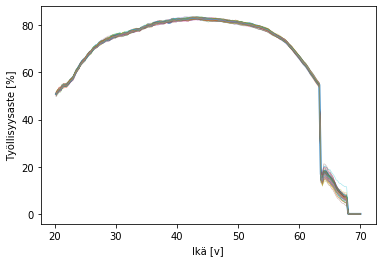

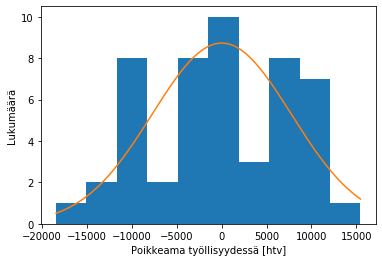

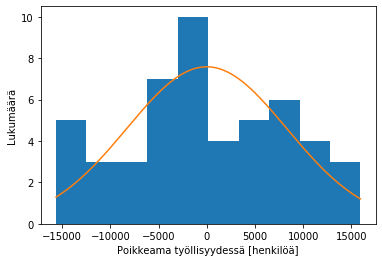

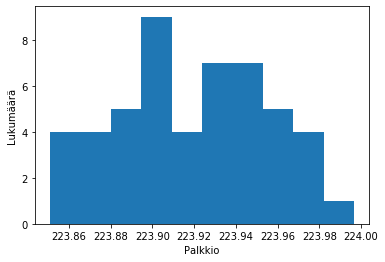

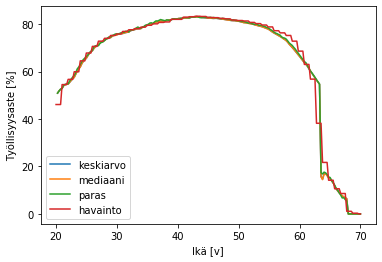

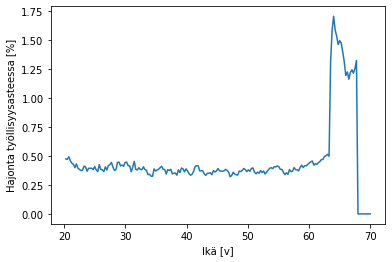

In [6]:
cc2_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,perustulo=False,randomness=randomness)
toemalli='best/toe12/malli_toe'
cc2_toe.run_distrib(n=50,startn=18,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,
                save=toemalli,plot=True,cont=True,start_from=perusmalli,results='results/toe12/distrib_toe12',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True



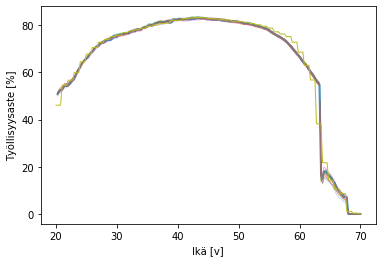

best_emp 5
Vaikutus työllisyyteen keskiarvo 2066513 htv, mediaani 2068644 htv std 7169 htv
   keskiarvo 2234665 työllistä, mediaani 2235197 työllistä, std 7383 työllistä


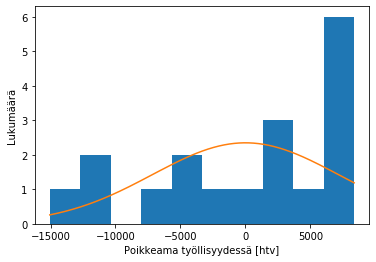

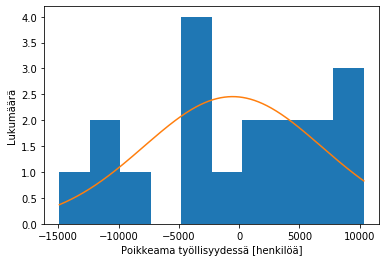

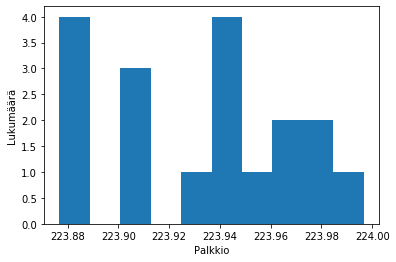

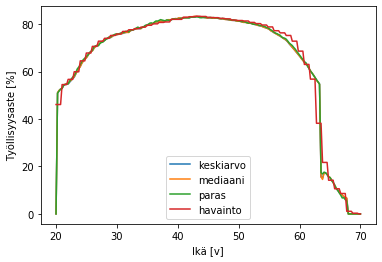

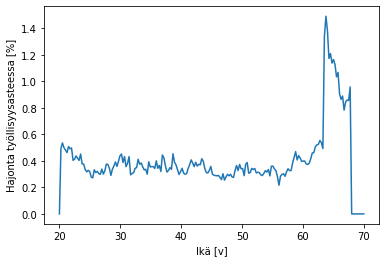

Vaikutus työllisyysasteeseen -1255.0 htv


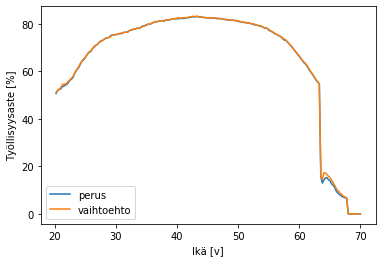

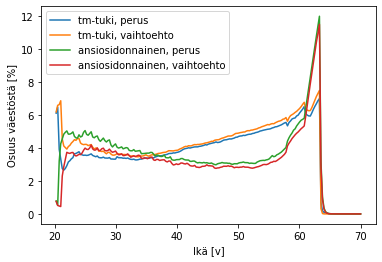

In [9]:
cc2_toe=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_toe.render_distrib(load='results/toe12/distrib_toe12_v',n=18,startn=0,stats_results='results/toe12/distrib_toe12_stats')
cc2_toe.compare_distrib('results/distrib_stats','results/toe12/distrib_toe12_stats')

# Porrasta vain 1. askel

In [5]:
cc3_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,
                     perustulo=False,randomness=randomness,porrasta_putki=False,
                     porrasta_1askel=True,porrasta_2askel=False,porrasta_3askel=False)
porrasmalli='best/porrastus_1askel/malli_porrastus'
cc3_porras.run_distrib(n=50,startn=0,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,verbose=False,
                save=porrasmalli,plot=True,cont=True,start_from=perusmalli,results='results/porrastus_1askel/distrib_porras',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

computing 0
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1921     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00388 |
| total_timesteps    | 0        |
| value_loss         | 0.00968  |
---------------------------------
---------------------------------
| explained_variance | 0.875    |
| fps                | 3303     |
| nupdates           | 10       |
| policy_entropy     | 0.96     |
| policy_loss        | 0.597    |
| total_timesteps    | 21825    |
| value_lo

---------------------------------
| explained_variance | 0.999    |
| fps                | 2719     |
| nupdates           | 260      |
| policy_entropy     | 0.982    |
| policy_loss        | 0.00662  |
| total_timesteps    | 628075   |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2719     |
| nupdates           | 270      |
| policy_entropy     | 0.97     |
| policy_loss        | -0.0172  |
| total_timesteps    | 652325   |
| value_loss         | 0.0214   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2719     |
| nupdates           | 280      |
| policy_entropy     | 0.965    |
| policy_loss        | -0.0011  |
| total_timesteps    | 676575   |
| value_loss         | 0.0461   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2718     |
| nupdates           | 530      |
| policy_entropy     | 1        |
| policy_loss        | 0.00852  |
| total_timesteps    | 1282825  |
| value_loss         | 0.024    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2719     |
| nupdates           | 540      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.014   |
| total_timesteps    | 1307075  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2719     |
| nupdates           | 550      |
| policy_entropy     | 0.975    |
| policy_loss        | -0.00938 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0195   |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 800      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0152  |
| total_timesteps    | 1937575  |
| value_loss         | 0.00774  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 810      |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0134  |
| total_timesteps    | 1961825  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 820      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0171  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1070     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0103  |
| total_timesteps    | 2592325  |
| value_loss         | 0.00973  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2728     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00867  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0286   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1090     |
| policy_entropy     | 0.976    |
| policy_loss        | -0.0161  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2723     |
| nupdates           | 1340     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00794 |
| total_timesteps    | 3247075  |
| value_loss         | 0.0118   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 1350     |
| policy_entropy     | 1        |
| policy_loss        | -0.00961 |
| total_timesteps    | 3271325  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2719     |
| nupdates           | 1360     |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0069  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0178   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2690     |
| nupdates           | 1610     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0229  |
| total_timesteps    | 3901825  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2689     |
| nupdates           | 1620     |
| policy_entropy     | 0.984    |
| policy_loss        | -0.0123  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0077   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2689     |
| nupdates           | 1630     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0104  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2701     |
| nupdates           | 1880     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0133  |
| total_timesteps    | 4556575  |
| value_loss         | 0.00879  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2702     |
| nupdates           | 1890     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0101  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2702     |
| nupdates           | 1900     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0143  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2711     |
| nupdates           | 2150     |
| policy_entropy     | 1        |
| policy_loss        | 0.00251  |
| total_timesteps    | 5211325  |
| value_loss         | 0.00997  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2712     |
| nupdates           | 2160     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0115  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00828  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2712     |
| nupdates           | 2170     |
| policy_entropy     | 1        |
| policy_loss        | -0.0239  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00816  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2720     |
| nupdates           | 2420     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0231  |
| total_timesteps    | 5866075  |
| value_loss         | 0.00949  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0146  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00798  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 2440     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00474 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00859  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 1
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1836     |
| nupdates           | 1        |
| policy_entropy     | 1.08     |
| policy_loss        | -0.014   |
| total_timesteps    | 0        |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | -0.704   |
| fps                | 3335     |
| nupdates           | 10       |
| policy_entropy     | 1.05     |
| policy_loss        | -0.863   |
| total_timesteps    | 21825    |
| value_loss         | 21.3     |
---------------------------------
---------------------------------
| explained_variance | 0.932    |
| fps                | 3023     |
| nupdates           | 20       |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00706 |
| total_timesteps    | 46075    |
| value_loss         | 0.781    |
--------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 2769     |
| nupdates           | 270      |
| policy_entropy     | 0.995    |
| policy_loss        | -0.011   |
| total_timesteps    | 652325   |
| value_loss         | 0.0262   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2766     |
| nupdates           | 280      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0257  |
| total_timesteps    | 676575   |
| value_loss         | 0.0323   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 290      |
| policy_entropy     | 0.977    |
| policy_loss        | -0.00019 |
| total_timesteps    | 700825   |
| value_loss         | 0.0149   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2722     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0149  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0216   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2723     |
| nupdates           | 550      |
| policy_entropy     | 0.974    |
| policy_loss        | -0.00775 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2724     |
| nupdates           | 560      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0427  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0403   |
---------------------------------
----------------------------------
| explained_variance | 0.996     |
| fps       

---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 810      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00721 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 820      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00745 |
| total_timesteps    | 1986075  |
| value_loss         | 0.00852  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 830      |
| policy_entropy     | 0.992    |
| policy_loss        | -0.00412 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1080     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.00893 |
| total_timesteps    | 2616575  |
| value_loss         | 0.00679  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1090     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0216  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0175  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1350     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0156  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1360     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0139  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1370     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00111 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00788  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1620     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00972 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00714  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1630     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0132  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00857  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1640     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0141  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00784  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 1890     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00757 |
| total_timesteps    | 4580825  |
| value_loss         | 0.0076   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 1900     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00554 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00683  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 1910     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0193  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 2160     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0341  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0156   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 2170     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0136  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00814  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 2180     |
| policy_entropy     | 0.991    |
| policy_loss        | 0.00676  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 2430     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0177  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 2440     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00649 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00784  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0106  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00884  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 2
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.998    |
| fps                | 1883     |
| nupdates           | 1        |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0099  |
| total_timesteps    | 0        |
| value_loss         | 0.0185   |
---------------------------------
---------------------------------
| explained_variance | 0.78     |
| fps                | 3266     |
| nupdates           | 10       |
| policy_entropy     | 0.961    |
| policy_loss        | 0.522    |
| total_timesteps    | 21825    |
| value_loss         | 2.68     |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2968     |
| nupdates           | 20       |
| policy_entropy     | 0.969    |
| policy_loss        | -0.149   |
| total_timesteps    | 46075    |
| value_loss         | 0.155    |
--------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2706     |
| nupdates           | 270      |
| policy_entropy     | 0.954    |
| policy_loss        | -0.00302 |
| total_timesteps    | 652325   |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2706     |
| nupdates           | 280      |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0116  |
| total_timesteps    | 676575   |
| value_loss         | 0.00991  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2706     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00288 |
| total_timesteps    | 700825   |
| value_loss         | 0.0323   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2703     |
| nupdates           | 540      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00245 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2703     |
| nupdates           | 550      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0255  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0391   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2704     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0018  |
| total_timesteps    | 1355575  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2707     |
| nupdates           | 810      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0131  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0099   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2707     |
| nupdates           | 820      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0192  |
| total_timesteps    | 1986075  |
| value_loss         | 0.00775  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2707     |
| nupdates           | 830      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00597 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2663     |
| nupdates           | 1080     |
| policy_entropy     | 0.976    |
| policy_loss        | -0.0085  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0156   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2661     |
| nupdates           | 1090     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.00104 |
| total_timesteps    | 2640825  |
| value_loss         | 0.0233   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2660     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0178  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0137   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2664     |
| nupdates           | 1350     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00658 |
| total_timesteps    | 3271325  |
| value_loss         | 0.00757  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2664     |
| nupdates           | 1360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0116  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0313   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2665     |
| nupdates           | 1370     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.022   |
| total_timesteps    | 3319825  |
| value_loss         | 0.00832  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2679     |
| nupdates           | 1620     |
| policy_entropy     | 0.99     |
| policy_loss        | -0.0135  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00466  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2680     |
| nupdates           | 1630     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0121  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00651  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2680     |
| nupdates           | 1640     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0179  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00754  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2692     |
| nupdates           | 1890     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0198  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00772  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2692     |
| nupdates           | 1900     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0213  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00953  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2692     |
| nupdates           | 1910     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00484 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00552  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2701     |
| nupdates           | 2160     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0258  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00662  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2701     |
| nupdates           | 2170     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0231  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2702     |
| nupdates           | 2180     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0132  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00711  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2709     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.032   |
| total_timesteps    | 5890325  |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2709     |
| nupdates           | 2440     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0127  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00689  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2709     |
| nupdates           | 2450     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0198  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 3
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 1        |
| fps                | 1838     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00873  |
| total_timesteps    | 0        |
| value_loss         | 0.00611  |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 3258     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00121  |
| total_timesteps    | 21825    |
| value_loss         | 0.245    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2967     |
| nupdates           | 20       |
| policy_entropy     | 1.05     |
| policy_loss        | -0.221   |
| total_timesteps    | 46075    |
| value_loss         | 0.276    |
--------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 270      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0157  |
| total_timesteps    | 652325   |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2746     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0332  |
| total_timesteps    | 676575   |
| value_loss         | 0.035    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 290      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0496  |
| total_timesteps    | 700825   |
| value_loss         | 0.0191   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0113  |
| total_timesteps    | 1307075  |
| value_loss         | 0.00923  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 550      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0275  |
| total_timesteps    | 1331325  |
| value_loss         | 0.00925  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 560      |
| policy_entropy     | 1        |
| policy_loss        | -0.0199  |
| total_timesteps    | 1355575  |
| value_loss         | 0.014    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00694 |
| total_timesteps    | 1961825  |
| value_loss         | 0.00705  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 820      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00556 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0064   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2727     |
| nupdates           | 830      |
| policy_entropy     | 0.978    |
| policy_loss        | -0.0163  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0294   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 1080     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0231  |
| total_timesteps    | 2616575  |
| value_loss         | 0.00871  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2729     |
| nupdates           | 1090     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00359 |
| total_timesteps    | 2640825  |
| value_loss         | 0.0193   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0115  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1350     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0166  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1360     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00048 |
| total_timesteps    | 3295575  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2732     |
| nupdates           | 1370     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0217  |
| total_timesteps    | 3319825  |
| value_loss         | 0.00666  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1620     |
| policy_entropy     | 0.957    |
| policy_loss        | -0.00787 |
| total_timesteps    | 3926075  |
| value_loss         | 0.0161   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 1630     |
| policy_entropy     | 1.04     |
| policy_loss        | 0.00422  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00942  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 1640     |
| policy_entropy     | 0.976    |
| policy_loss        | -0.012   |
| total_timesteps    | 3974575  |
| value_loss         | 0.00898  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1890     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0222  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1900     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0144  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0116   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2734      |
| nupdates           | 1910      |
| policy_entropy     | 0.997     |
| policy_loss        | -6.51e-05 |
| total_timesteps    | 4629325   |
| value_loss         | 0.0072    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 2160     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00993 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00599  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 2170     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0137  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00701  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 2180     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0103  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0067   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2711     |
| nupdates           | 2430     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0129  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00738  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2710     |
| nupdates           | 2440     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00592 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00741  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2710     |
| nupdates           | 2450     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0202  |
| total_timesteps    | 5938825  |
| value_loss         | 0.009    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 4
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1803     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.016   |
| total_timesteps    | 0        |
| value_loss         | 0.0178   |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 3242     |
| nupdates           | 10       |
| policy_entropy     | 0.972    |
| policy_loss        | 0.258    |
| total_timesteps    | 21825    |
| value_loss         | 0.736    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2965     |
| nupdates           | 20       |
| policy_entropy     | 0.939    |
| policy_loss        | 0.0244   |
| total_timesteps    | 46075    |
| value_loss         | 0.196    |
--------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 2742     |
| nupdates           | 270      |
| policy_entropy     | 0.986    |
| policy_loss        | -0.0178  |
| total_timesteps    | 652325   |
| value_loss         | 0.0301   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 280      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0131  |
| total_timesteps    | 676575   |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 290      |
| policy_entropy     | 0.995    |
| policy_loss        | 0.000524 |
| total_timesteps    | 700825   |
| value_loss         | 0.00892  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 540      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0178  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0157   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 550      |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00944 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2736     |
| nupdates           | 560      |
| policy_entropy     | 1.1      |
| policy_loss        | -0.00349 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0201   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 810      |
| policy_entropy     | 0.967    |
| policy_loss        | -0.0136  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 820      |
| policy_entropy     | 0.951    |
| policy_loss        | -0.00852 |
| total_timesteps    | 1986075  |
| value_loss         | 0.00739  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 830      |
| policy_entropy     | 0.984    |
| policy_loss        | 0.00532  |
| total_timesteps    | 2010325  |
| value_loss         | 0.00998  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1080     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0211  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1090     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0215  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00026 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2738     |
| nupdates           | 1350     |
| policy_entropy     | 1        |
| policy_loss        | -0.0198  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0381   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2738     |
| nupdates           | 1360     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.00225 |
| total_timesteps    | 3295575  |
| value_loss         | 0.0323   |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2739     |
| nupdates           | 1370     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0909  |
| total_timesteps    | 3319825  |
| value_loss         | 0.369    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1620     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0258  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1630     |
| policy_entropy     | 0.984    |
| policy_loss        | -0.00438 |
| total_timesteps    | 3950325  |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1640     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0125  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1890     |
| policy_entropy     | 0.974    |
| policy_loss        | 0.000832 |
| total_timesteps    | 4580825  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1900     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0192  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00776  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1910     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.00679 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00837  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2160     |
| policy_entropy     | 0.97     |
| policy_loss        | -0.00985 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00804  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00562 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00713  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00295  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00843  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2430     |
| policy_entropy     | 1.11     |
| policy_loss        | -0.0247  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00639  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2440     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0159  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2450     |
| policy_entropy     | 0.99     |
| policy_loss        | -0.0135  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 5
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1659     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00271  |
| total_timesteps    | 0        |
| value_loss         | 0.00763  |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 3018     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.166    |
| total_timesteps    | 21825    |
| value_loss         | 0.435    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 2727     |
| nupdates           | 20       |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0633  |
| total_timesteps    | 46075    |
| value_loss         | 0.596    |
--------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2585     |
| nupdates           | 270      |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0121  |
| total_timesteps    | 652325   |
| value_loss         | 0.00893  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2590     |
| nupdates           | 280      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0259  |
| total_timesteps    | 676575   |
| value_loss         | 0.0223   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2594     |
| nupdates           | 290      |
| policy_entropy     | 0.94     |
| policy_loss        | 0.0158   |
| total_timesteps    | 700825   |
| value_loss         | 0.0618   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2659     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00839  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2661     |
| nupdates           | 550      |
| policy_entropy     | 1        |
| policy_loss        | -0.00922 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2661     |
| nupdates           | 560      |
| policy_entropy     | 0.968    |
| policy_loss        | 0.00303  |
| total_timesteps    | 1355575  |
| value_loss         | 0.00831  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2682     |
| nupdates           | 810      |
| policy_entropy     | 0.97     |
| policy_loss        | -0.0292  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0178   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2683     |
| nupdates           | 820      |
| policy_entropy     | 0.998    |
| policy_loss        | -0.012   |
| total_timesteps    | 1986075  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2684     |
| nupdates           | 830      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0221  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0193   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2700     |
| nupdates           | 1080     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0163  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2700     |
| nupdates           | 1090     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0149  |
| total_timesteps    | 2640825  |
| value_loss         | 0.00991  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2701     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00124 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2712     |
| nupdates           | 1350     |
| policy_entropy     | 0.962    |
| policy_loss        | -0.0152  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0251   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2712     |
| nupdates           | 1360     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.00411 |
| total_timesteps    | 3295575  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2712     |
| nupdates           | 1370     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0306  |
| total_timesteps    | 3319825  |
| value_loss         | 0.00898  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.995    |
| fps                | 2721     |
| nupdates           | 1620     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0376  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0575   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 1630     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0149  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00663  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 1640     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00692 |
| total_timesteps    | 3974575  |
| value_loss         | 0.00934  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0168  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00952  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2728     |
| nupdates           | 1900     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0314  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0184   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1910     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0195  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2160     |
| policy_entropy     | 0.979    |
| policy_loss        | -0.0105  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00987  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2170     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0138  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2180     |
| policy_entropy     | 1        |
| policy_loss        | -0.0141  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00885  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 2430     |
| policy_entropy     | 0.986    |
| policy_loss        | -0.0207  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 2440     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.001    |
| total_timesteps    | 5914575  |
| value_loss         | 0.00789  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2738     |
| nupdates           | 2450     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00649 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00618  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 6
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1975     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0227  |
| total_timesteps    | 0        |
| value_loss         | 0.00848  |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 3373     |
| nupdates           | 10       |
| policy_entropy     | 0.986    |
| policy_loss        | -0.449   |
| total_timesteps    | 21825    |
| value_loss         | 0.63     |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 3029     |
| nupdates           | 20       |
| policy_entropy     | 0.994    |
| policy_loss        | 0.0731   |
| total_timesteps    | 46075    |
| value_loss         | 0.0821   |
--------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 270      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.00654 |
| total_timesteps    | 652325   |
| value_loss         | 0.00891  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2750     |
| nupdates           | 280      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0202  |
| total_timesteps    | 676575   |
| value_loss         | 0.029    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2750     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.029   |
| total_timesteps    | 700825   |
| value_loss         | 0.0248   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 540      |
| policy_entropy     | 1        |
| policy_loss        | -0.0148  |
| total_timesteps    | 1307075  |
| value_loss         | 0.00887  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 550      |
| policy_entropy     | 0.969    |
| policy_loss        | -0.00674 |
| total_timesteps    | 1331325  |
| value_loss         | 0.016    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 560      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0153  |
| total_timesteps    | 1355575  |
| value_loss         | 0.00972  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2734     |
| nupdates           | 810      |
| policy_entropy     | 0.971    |
| policy_loss        | -0.00185 |
| total_timesteps    | 1961825  |
| value_loss         | 0.019    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 820      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.00344 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 830      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00805 |
| total_timesteps    | 2010325  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1080     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00922 |
| total_timesteps    | 2616575  |
| value_loss         | 0.00937  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1090     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00968 |
| total_timesteps    | 2640825  |
| value_loss         | 0.00864  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2737      |
| nupdates           | 1100      |
| policy_entropy     | 1.06      |
| policy_loss        | -0.000298 |
| total_timesteps    | 2665075   |
| value_loss         | 0.00955   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1350     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00316 |
| total_timesteps    | 3271325  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1360     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0127  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00964 |
| total_timesteps    | 3319825  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

----------------------------------
| explained_variance | 0.999     |
| fps                | 2742      |
| nupdates           | 1620      |
| policy_entropy     | 1.03      |
| policy_loss        | -4.25e-05 |
| total_timesteps    | 3926075   |
| value_loss         | 0.00904   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1630     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00492 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00917  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1640     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0263  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 1        |
| fps                | 2744     |
| nupdates           | 1890     |
| policy_entropy     | 1        |
| policy_loss        | -0.00253 |
| total_timesteps    | 4580825  |
| value_loss         | 0.00569  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1900     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00687 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00816  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1910     |
| policy_entropy     | 1        |
| policy_loss        | -0.011   |
| total_timesteps    | 4629325  |
| value_loss         | 0.00622  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 2160     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0093  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00708  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 2170     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0106  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 2180     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0148  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00739  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2713     |
| nupdates           | 2430     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0222  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00974  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2714     |
| nupdates           | 2440     |
| policy_entropy     | 1        |
| policy_loss        | -0.0161  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2714     |
| nupdates           | 2450     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0165  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0071   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 7
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1856     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00453 |
| total_timesteps    | 0        |
| value_loss         | 0.00682  |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 3310     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0271   |
| total_timesteps    | 21825    |
| value_loss         | 0.215    |
---------------------------------
---------------------------------
| explained_variance | 0.857    |
| fps                | 3008     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.656   |
| total_timesteps    | 46075    |
| value_loss         | 2.09     |
--------------------------------

---------------------------------
| explained_variance | 0.992    |
| fps                | 2770     |
| nupdates           | 270      |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0442  |
| total_timesteps    | 652325   |
| value_loss         | 0.0931   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2769     |
| nupdates           | 280      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0372  |
| total_timesteps    | 676575   |
| value_loss         | 0.0201   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2768     |
| nupdates           | 290      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00269 |
| total_timesteps    | 700825   |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

KeyboardInterrupt: 

# Lyhempi työttömyysturva

In [ ]:
cc2_350=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,randomness=randomness)
lyhytmalli='best/350/malli_350'
cc2_350.run_distrib(n=50,startn=0,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,
                save=lyhytmalli,plot=True,cont=True,start_from=perusmalli,results='results/350/distrib_350',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

In [ ]:
cc2_350=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_350.render_distrib(load='results/350/distrib_350_v',n=1,startn=0,stats_results='results/350/distrib_350_stats')
cc2_350.compare_distrib('results/distrib_stats','results/350/distrib_350_stats')